In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def resumen(datos):
    return print('Forma:\n', datos.shape,'\n\n',
                 'Columnas:\n', datos.columns,'\n\n',
                 'Tipos:\n', datos.dtypes,'\n\n',
                 'Datos nulos:\n', datos.isnull().sum(),'\n\n',
                 'Cabecera:\n', datos.head(10),'\n\n',
                 'Últimos datos:\n', datos.tail(10),'\n\n',
                 'Estadísticos:\n', datos.describe([0.05,0.25,0.5,0.75,0.95])
                )
def truncar(numero, decimales = 0):
    return np.trunc(numero*10**decimales)/(10**decimales)

In [5]:
def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))

In [3]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Datos_juntos.csv',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    encoding = 'ascii',
    skiprows = [1],
    )

In [4]:
resumen(datos)

Forma:
 (29914, 134) 

 Columnas:
 Index(['Momento', 'TSS1', 'TSS2', 'TS1', 'TS2', 'TS3', 'TS4', 'TS_QG', 'U',
       'DIR',
       ...
       'e_s 1', 'VPD 1', 'e_s 2', 'VPD 2', 'e_s 3', 'VPD 3', 'e_s 4', 'VPD 4',
       'e_s Ts', 'VPD Ts'],
      dtype='object', length=134) 

 Tipos:
 Momento            float64
TSS1               float64
TSS2               float64
TS1                float64
TS2                float64
TS3                float64
TS4                float64
TS_QG              float64
U                  float64
DIR                float64
PP                 float64
TA1                float64
HR1                float64
TA2                float64
HR2                float64
TA3                float64
HR3                float64
TA4                float64
HR4                float64
QG1                float64
QG2                float64
WET                float64
RG                 float64
PAR                float64
TSH1               float64
HS1                float64
GH1       

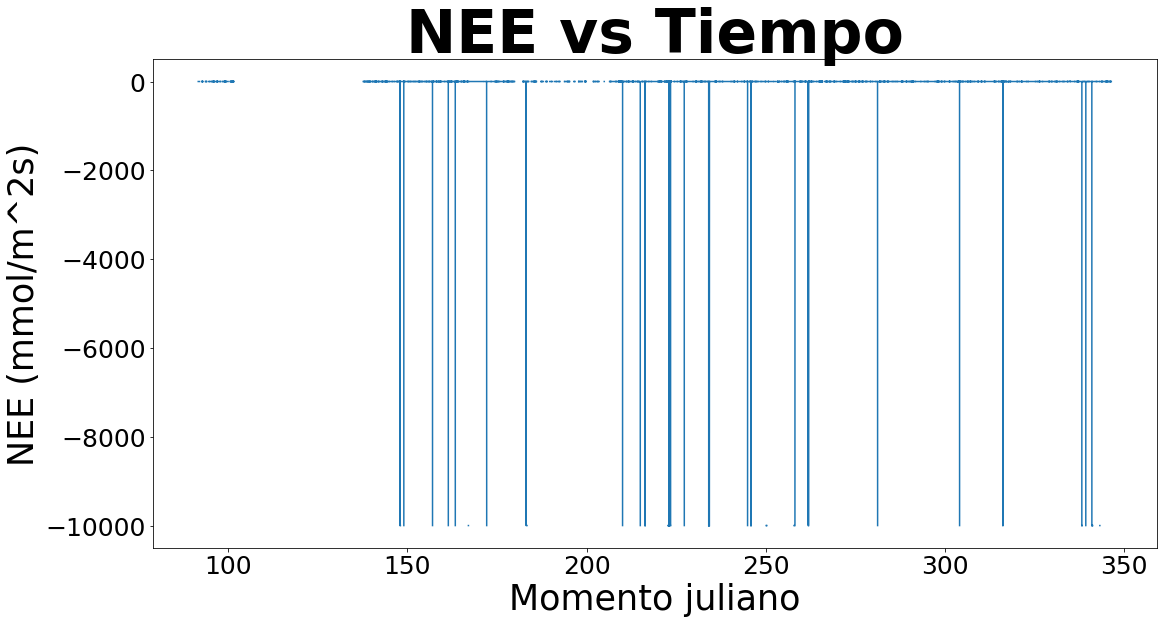

In [9]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos['Momento'], datos['  NEE[mmol/m2s]'], 'bo', markersize = 2)

In [10]:
datos.loc[datos['  NEE[mmol/m2s]'] < -9999, '  NEE[mmol/m2s]'] = np.nan

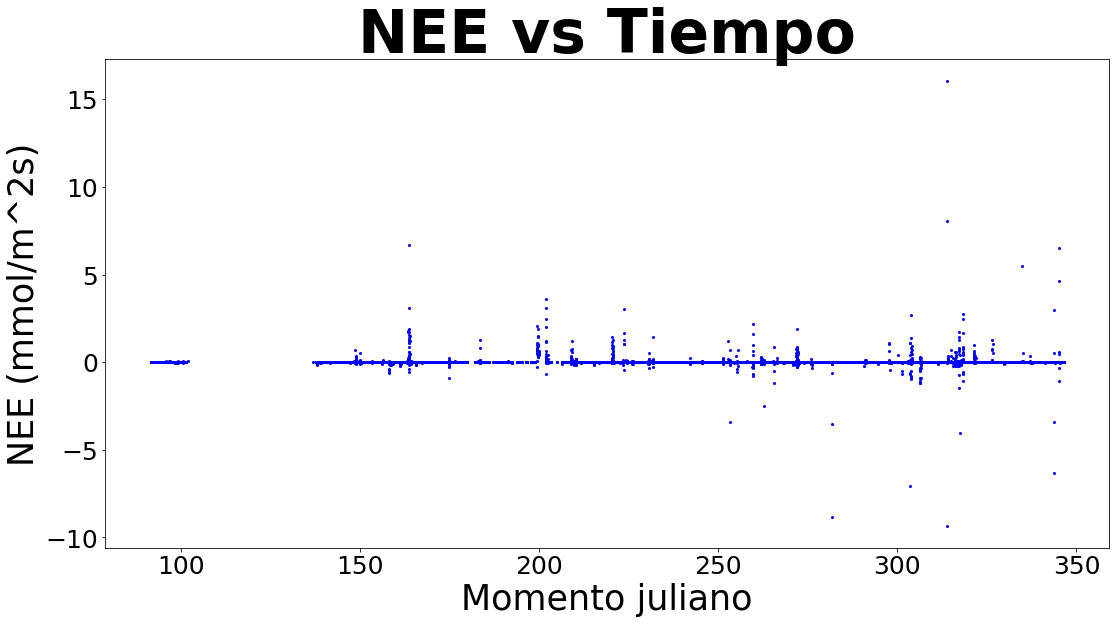

In [93]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos['Momento'], datos['  NEE[mmol/m2s]'], 'bo', markersize = 2)
#plt.ylim(-0.01, 0.01)
#plt.ylim(-2, 2)
#plt.xlim(330, 350)

In [94]:
nee_malo =[149, 158, 164, 175,
           199, 201, 209, 221,
           224, 259, 261, 265,
           271, 282, 303, 306,
           316, 317, 318, 321,
           343, 345
          ]

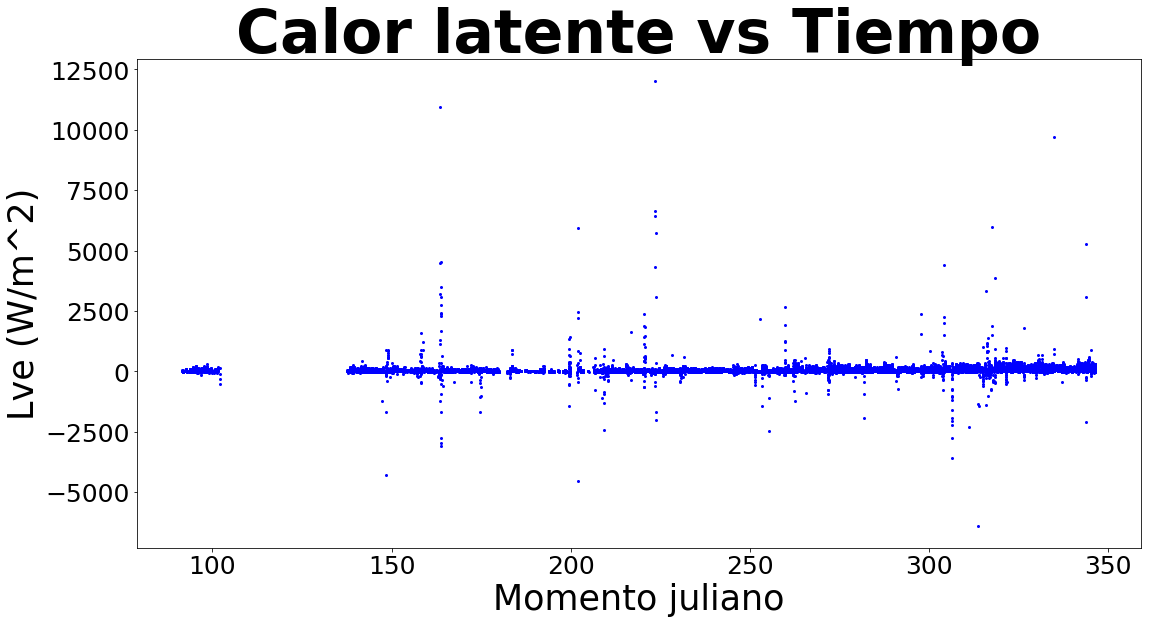

In [62]:
plt.figure(figsize = (18, 9))
metadata('Calor latente vs Tiempo', 'Momento juliano', 'Lve (W/m^2)')
plt.plot(datos['Momento'], datos['LvE[W/m2]      '], 'bo', markersize = 2)
#plt.ylim(-300, 300)
#plt.xlim(340, 350)

In [64]:
lve_malo = [102, 149, 159, 163,
            175, 200, 202, 209,
            221, 223, 259, 272,
            281, 304, 307, 316,
            317, 318, 321, 335,
            344
           ]

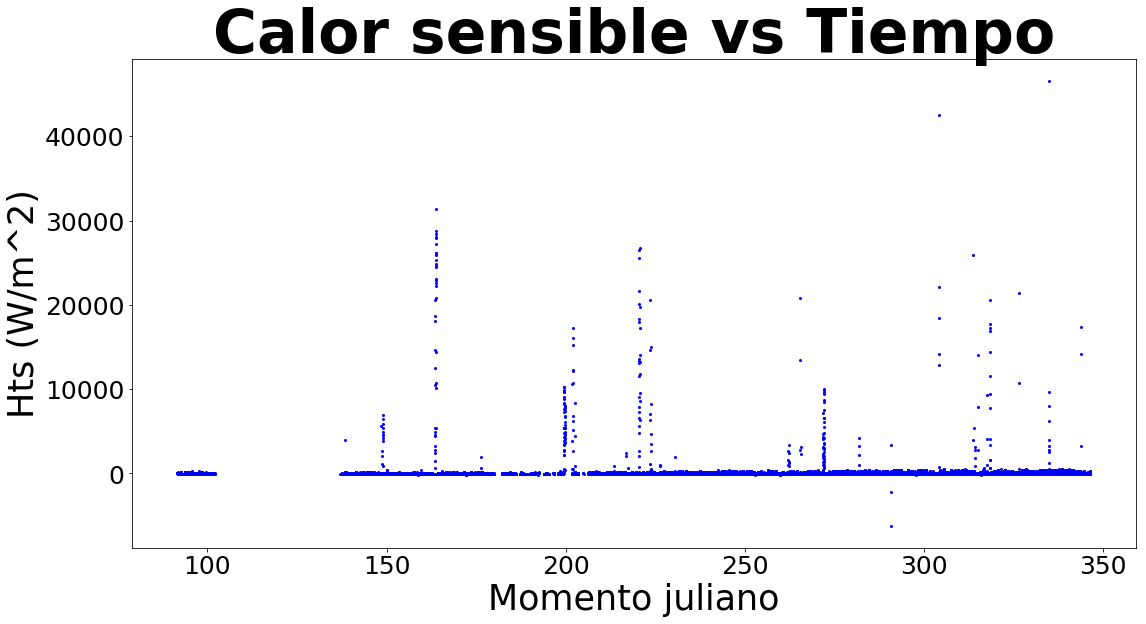

In [80]:
plt.figure(figsize = (18, 9))
metadata('Calor sensible vs Tiempo', 'Momento juliano', 'Hts (W/m^2)')
plt.plot(datos['Momento'], datos['HTs[W/m2]      '], 'bo', markersize = 2)
#plt.ylim(-300, 300)
#plt.xlim(330, 350)

In [81]:
hts_malo =[149, 163, 200, 202,
           221, 223, 262, 266,
           272, 282, 304, 314,
           315, 317, 318, 335,
           344
          ]

In [116]:
dias_malos = list(set(hts_malo + lve_malo + nee_malo))
filtrados = datos[(truncar(datos['Momento']) == dias_malos[0])]
for i in dias_malos[1:]:
    filtrados = filtrados.append(datos[truncar(datos['Momento']) == i])

In [117]:
filtrados.head()

Momento   TSS1   TSS2    TS1    TS2    TS3    TS4  TS_QG      U  \
19645  259.00000  12.28  12.59  12.06  12.58  11.40  10.86  13.02  0.874   
19646  259.01042  12.22  12.50  11.95  12.57  11.41  10.86  12.99  1.539   
19647  259.02083  12.17  12.46  12.05  12.55  11.40  10.86  12.95  2.922   
19648  259.03125  12.15  12.47  12.20  12.54  11.41  10.86  12.91  2.829   
19649  259.04167  12.16  12.47  12.21  12.52  11.41  10.85  12.88  2.972   

        DIR  ...      e_s 1  VPD 1      e_s 2  VPD 2      e_s 3  VPD 3  \
19645  53.5  ...  14.816989   1.17  14.633780  14.98  14.739604   1.61   
19646  41.7  ...  15.090655   1.21  14.816989  15.16  14.943501   1.63   
19647  42.5  ...  15.671696   1.36  15.449029  15.81  15.560013   1.79   
19648  44.3  ...  15.886865   1.56  15.712482  16.08  15.814856   1.96   
19649  39.3  ...  15.938477   1.64  15.743133  16.11  15.845682   2.03   

           e_s 4  VPD 4     e_s Ts  VPD Ts  
19645  14.972831   1.26  15.081454   -4.57  
19646  15.229145   1.28  15.695066   -4.67  
19647  15.825125   1.44  15.820788   -4.96  
19648  16.062945   1.65  15.825293   -4.95  
19649  16.094195   1.77  15.736558   -4.89  

[5 rows x 134 columns]

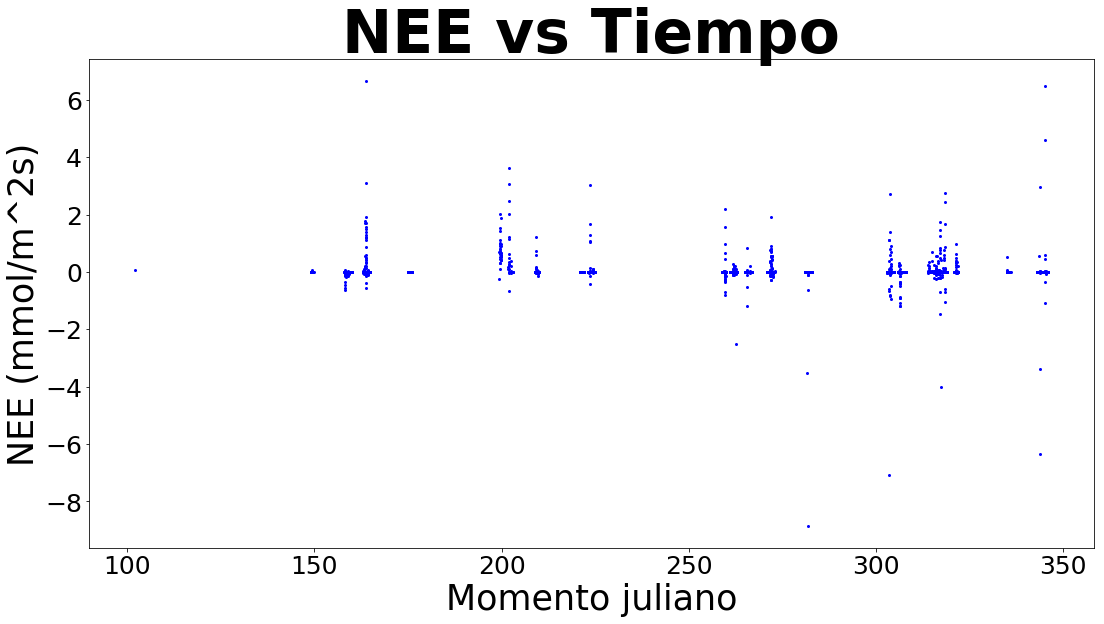

In [118]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(filtrados['Momento'], filtrados['  NEE[mmol/m2s]'], 'bo', markersize = 2)

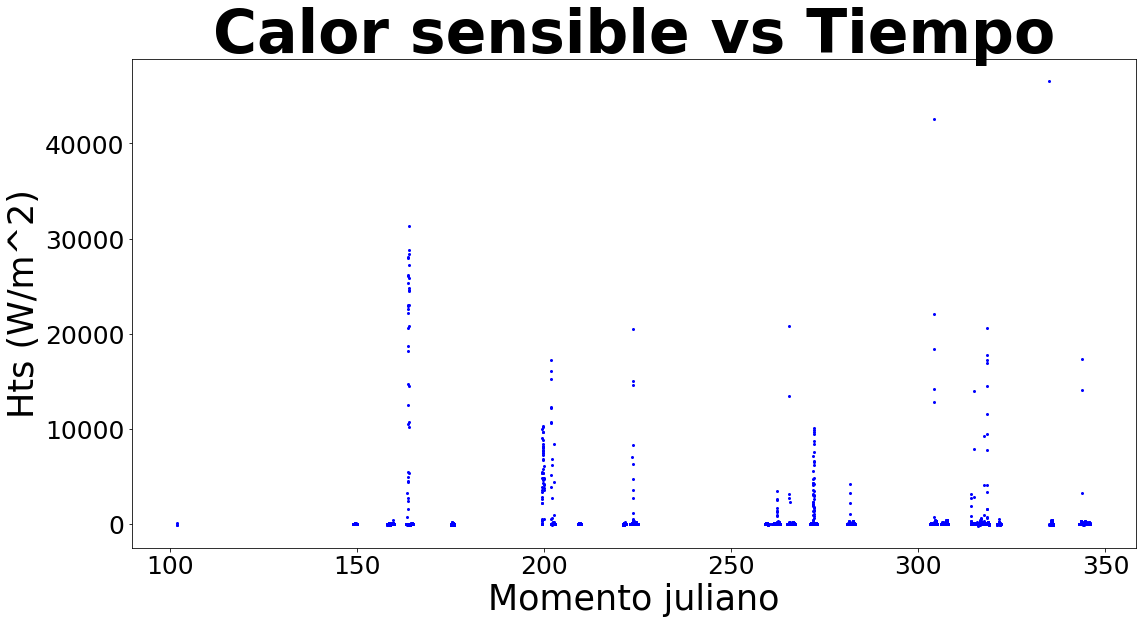

In [120]:
plt.figure(figsize = (18, 9))
metadata('Calor sensible vs Tiempo', 'Momento juliano', 'Hts (W/m^2)')
plt.plot(filtrados['Momento'], filtrados['HTs[W/m2]      '], 'bo', markersize = 2)

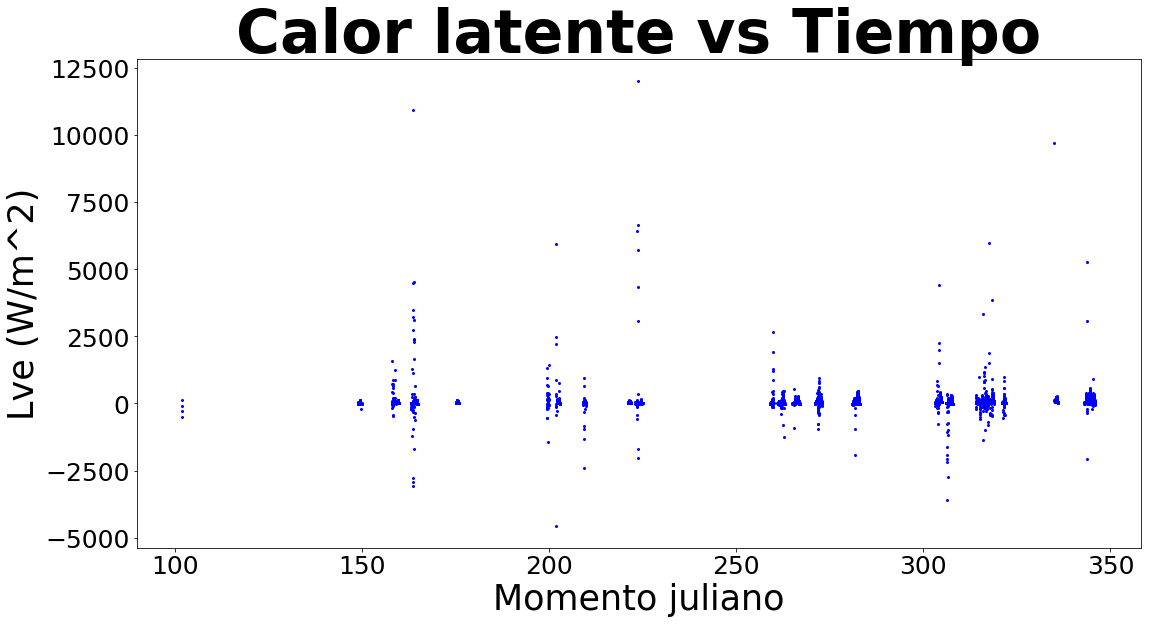

In [121]:
plt.figure(figsize = (18, 9))
metadata('Calor latente vs Tiempo', 'Momento juliano', 'Lve (W/m^2)')
plt.plot(filtrados['Momento'], filtrados['LvE[W/m2]      '], 'bo', markersize = 2)

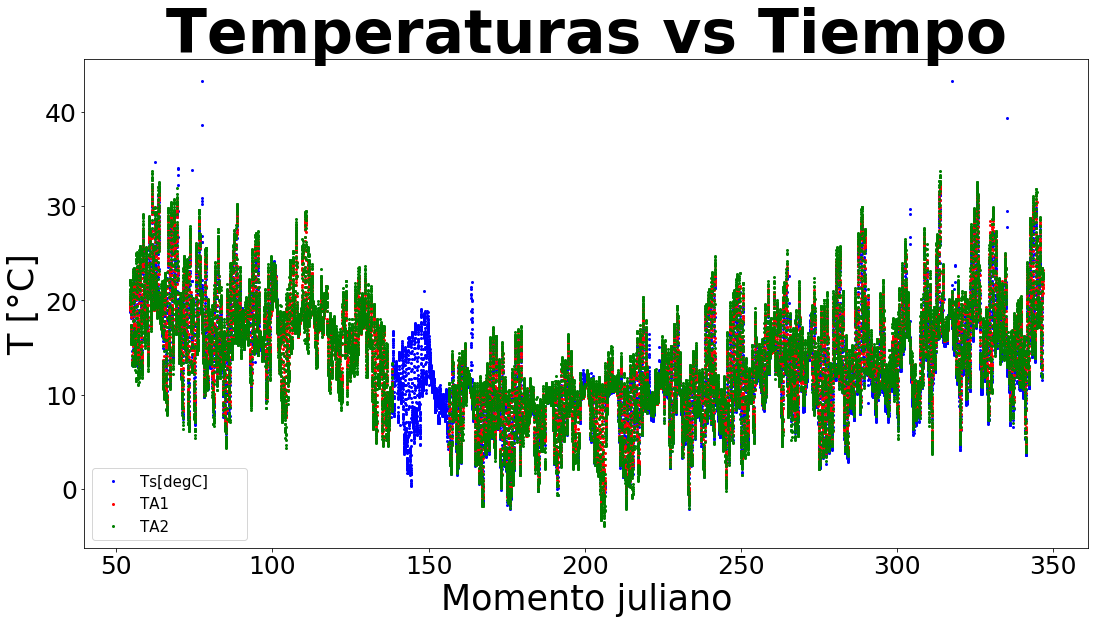

In [138]:
plt.figure(figsize = (18, 9))
metadata('Temperaturas vs Tiempo', 'Momento juliano', 'T [°C]')
plt.plot(datos['Momento'], datos['Ts[degC]       '], 'bo', markersize = 2)
plt.plot(datos['Momento'], datos['TA1'], 'ro', markersize = 2)
plt.plot(datos['Momento'], datos['TA2'], 'go', markersize = 2)
plt.legend(fontsize = 15)

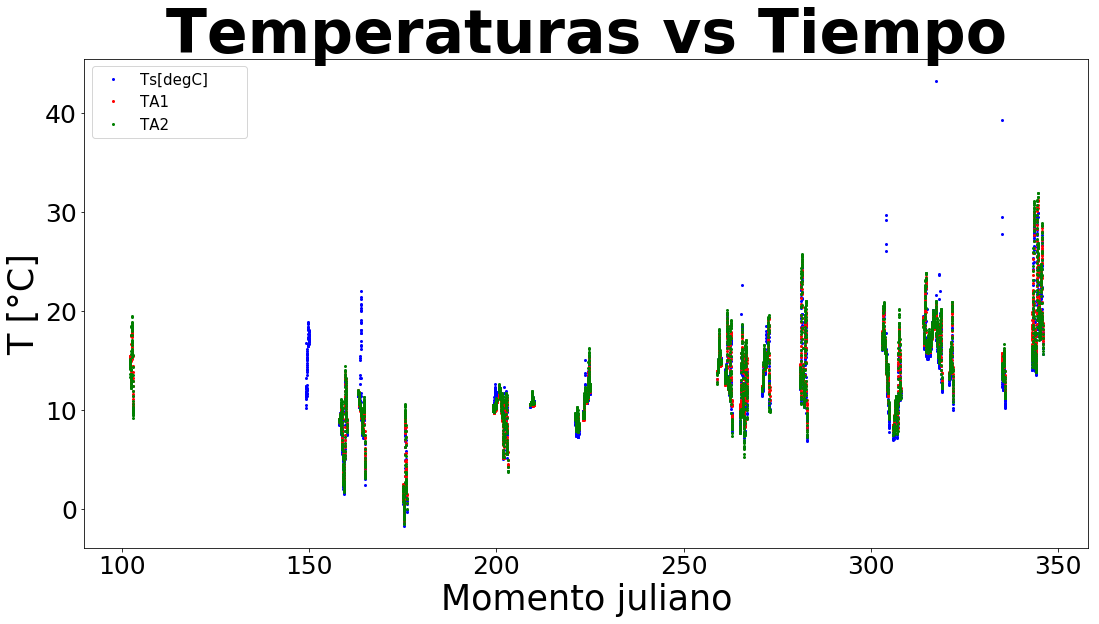

In [128]:
plt.figure(figsize = (18, 9))
metadata('Temperaturas vs Tiempo', 'Momento juliano', 'T [°C]')
plt.plot(filtrados['Momento'], filtrados['Ts[degC]       '], 'bo', markersize = 2)
plt.plot(filtrados['Momento'], filtrados['TA1'], 'ro', markersize = 2)
plt.plot(filtrados['Momento'], filtrados['TA2'], 'go', markersize = 2)
plt.legend(fontsize = 15)

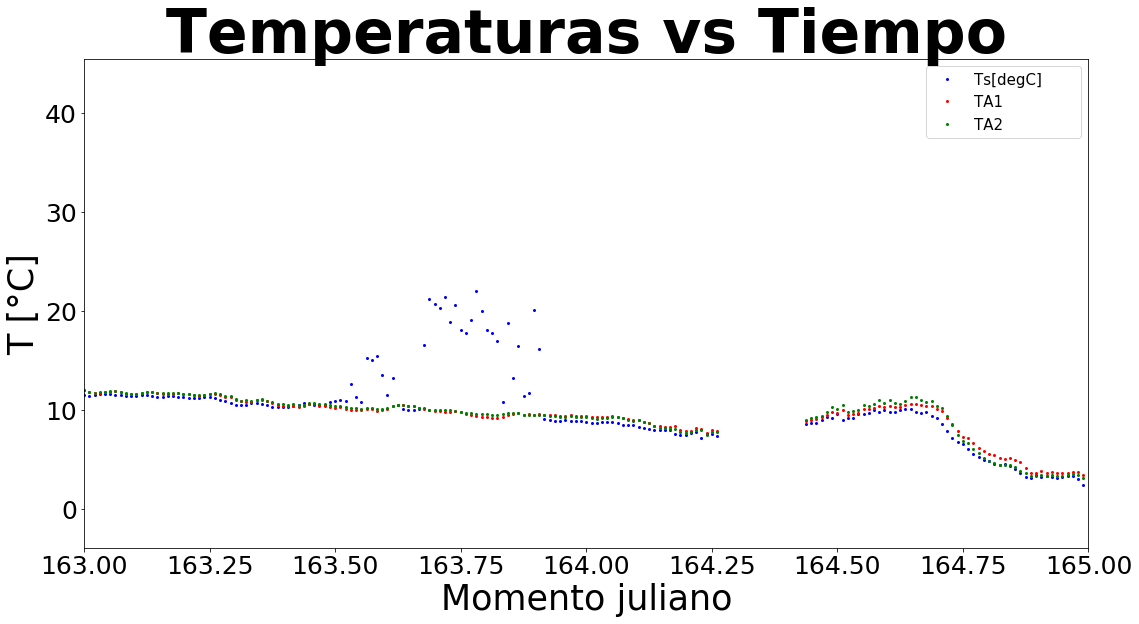

In [129]:
plt.figure(figsize = (18, 9))
metadata('Temperaturas vs Tiempo', 'Momento juliano', 'T [°C]')
plt.plot(filtrados['Momento'], filtrados['Ts[degC]       '], 'bo', markersize = 2)
plt.plot(filtrados['Momento'], filtrados['TA1'], 'ro', markersize = 2)
plt.plot(filtrados['Momento'], filtrados['TA2'], 'go', markersize = 2)
plt.xlim(163, 165)
plt.legend(fontsize = 15)

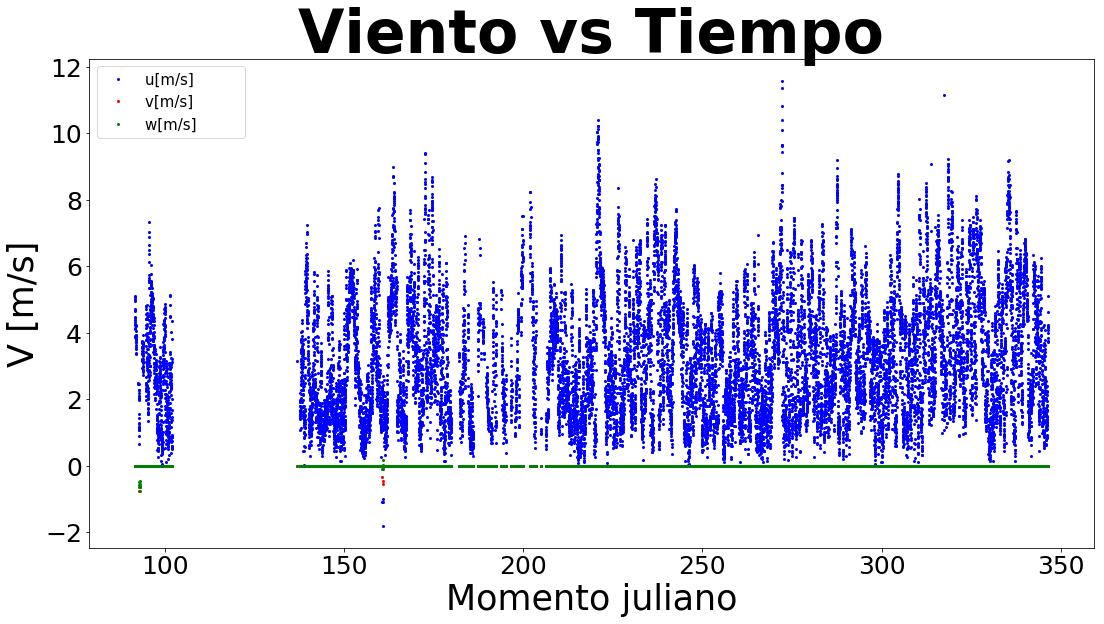

In [137]:
plt.figure(figsize = (18, 9))
metadata('Viento vs Tiempo', 'Momento juliano', 'V [m/s]')
plt.plot(datos['Momento'], datos['u[m/s]         '], 'bo', markersize = 2)
plt.plot(datos['Momento'], datos['v[m/s]         '], 'ro', markersize = 2)
plt.plot(datos['Momento'], datos['w[m/s]         '], 'go', markersize = 2)
plt.legend(fontsize = 15)

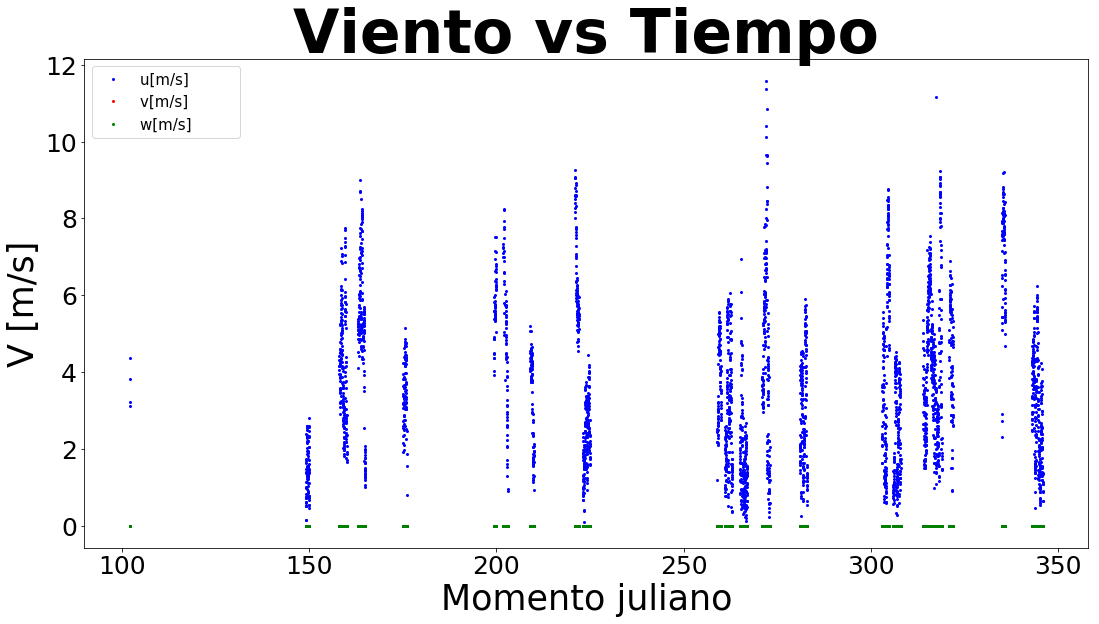

In [132]:
plt.figure(figsize = (18, 9))
metadata('Viento vs Tiempo', 'Momento juliano', 'V [m/s]')
plt.plot(filtrados['Momento'], filtrados['u[m/s]         '], 'bo', markersize = 2)
plt.plot(filtrados['Momento'], filtrados['v[m/s]         '], 'ro', markersize = 2)
plt.plot(filtrados['Momento'], filtrados['w[m/s]         '], 'go', markersize = 2)
plt.legend(fontsize = 15)

In [139]:
filtrados.to_csv('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Datos_malos.csv',
                 sep = '\t',
                 na_rep = -9999,
                 index = False,
                 encoding = 'ascii'
                 )

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


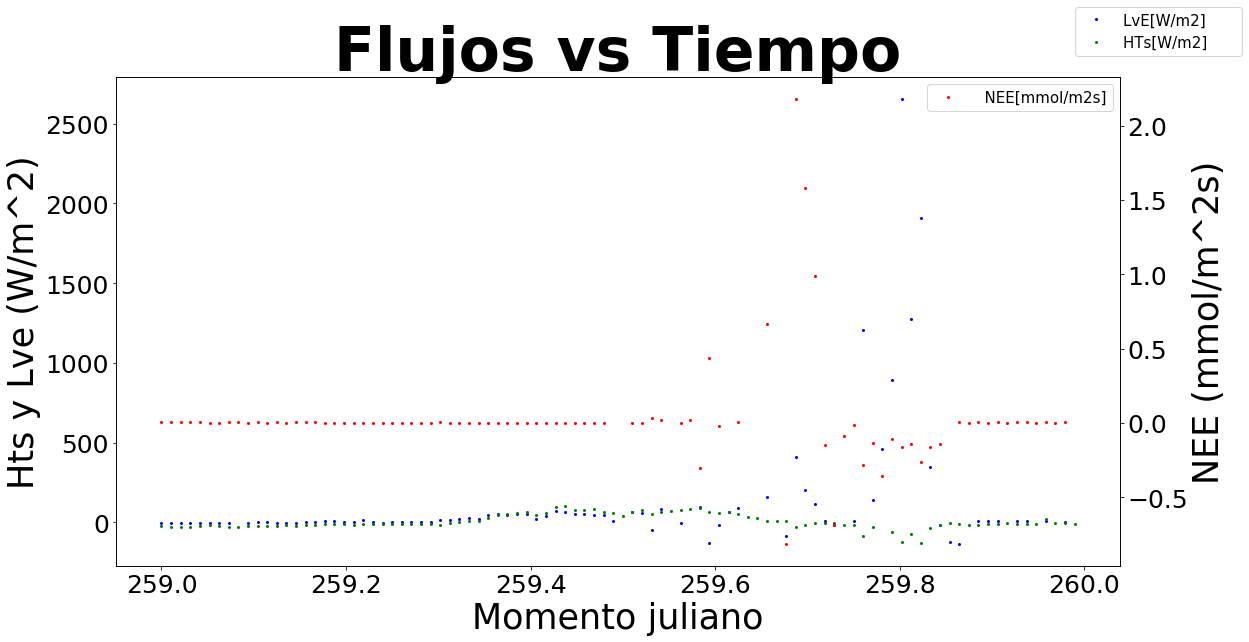

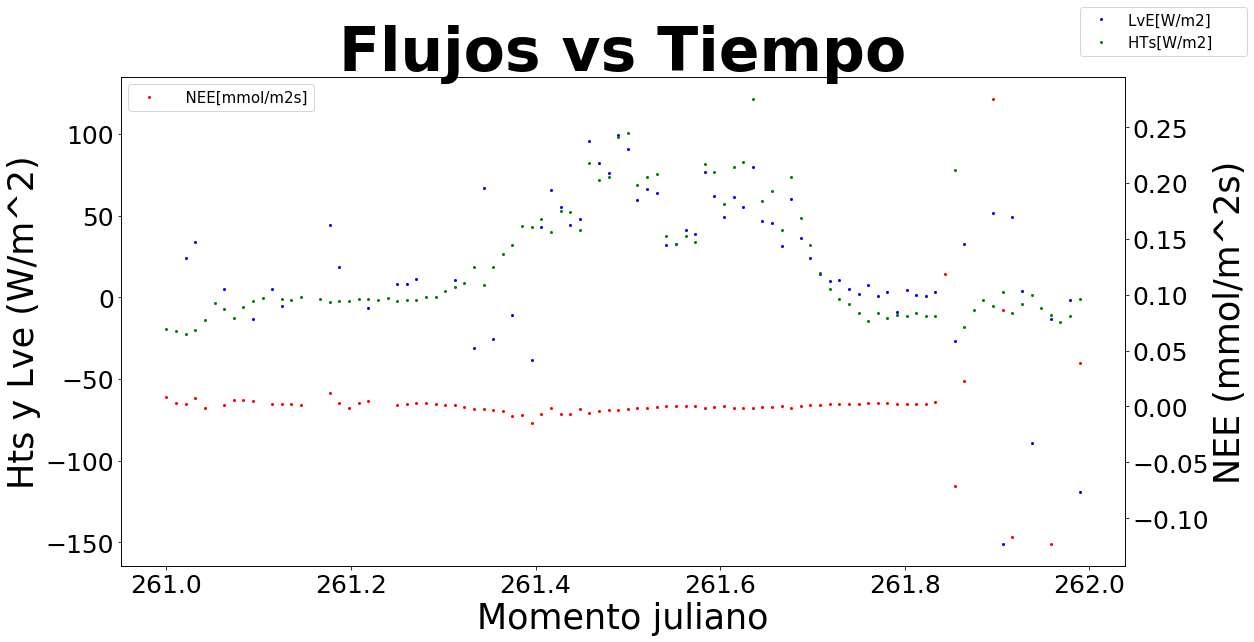

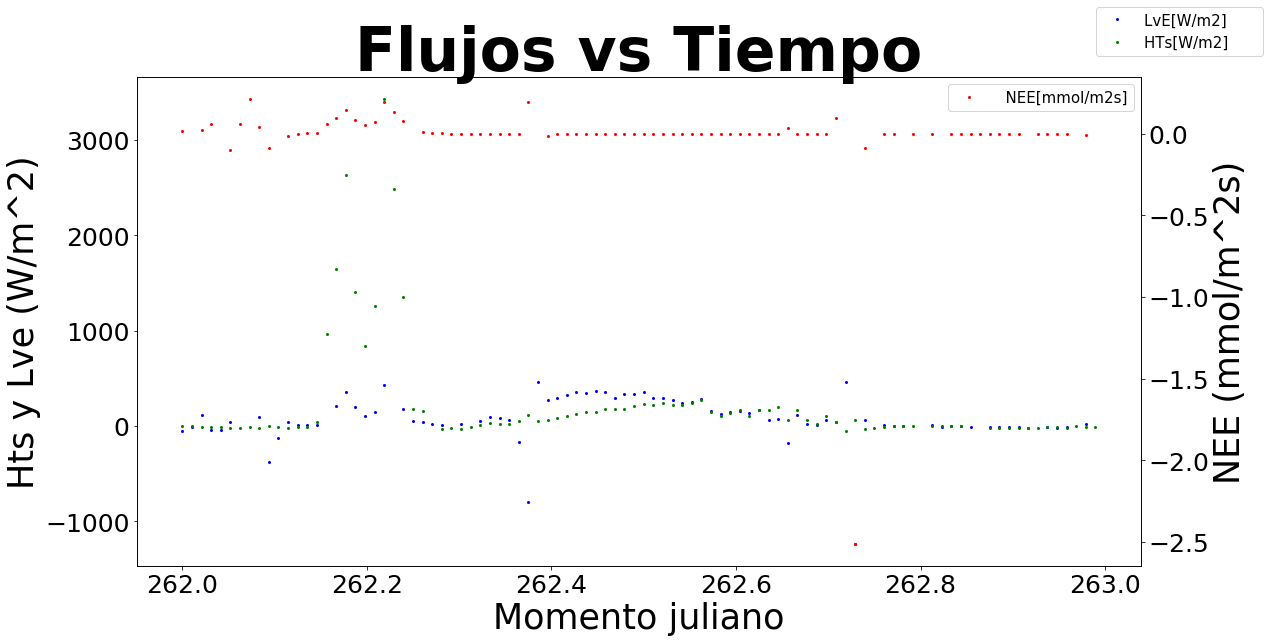

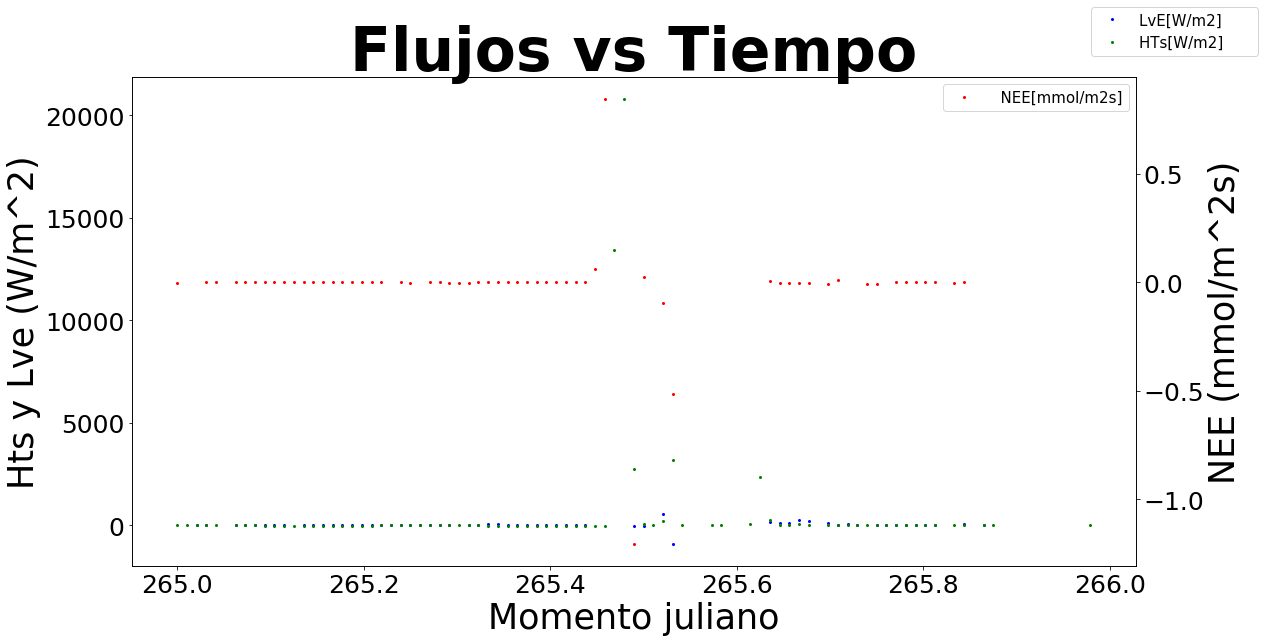

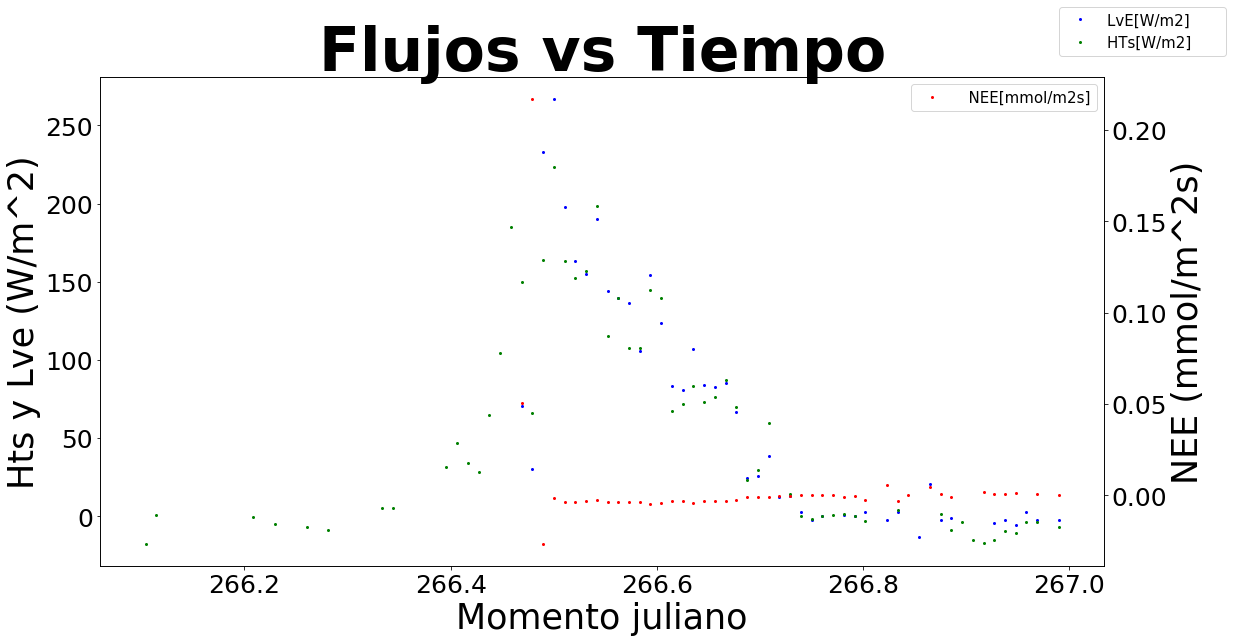

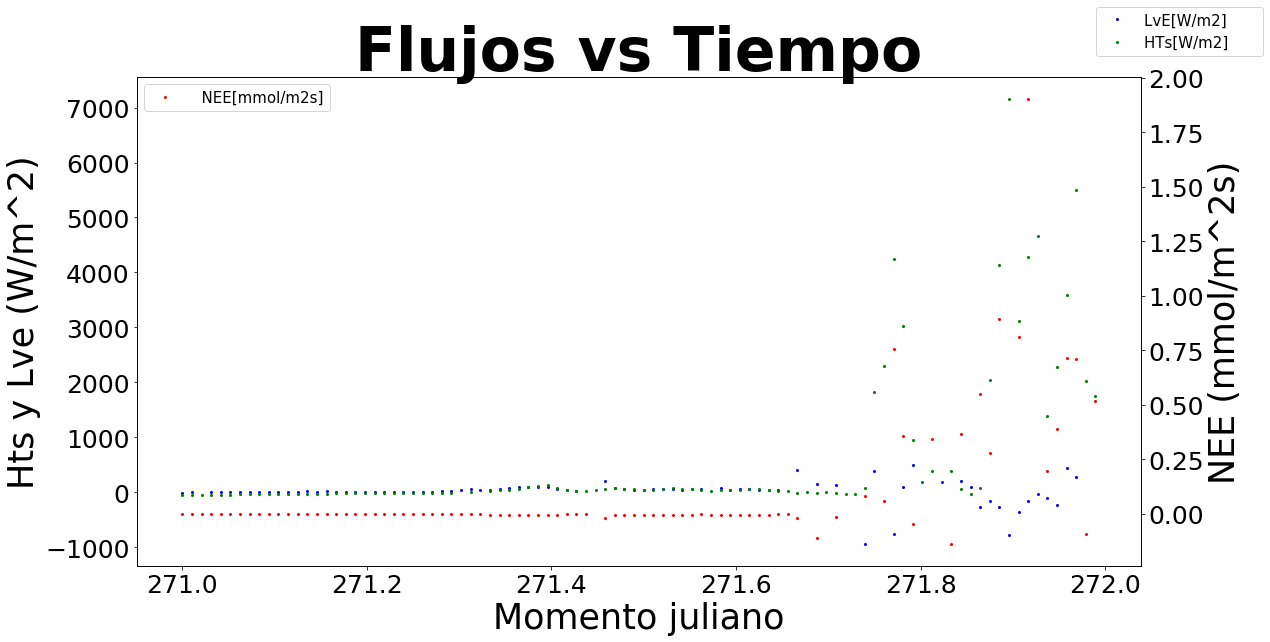

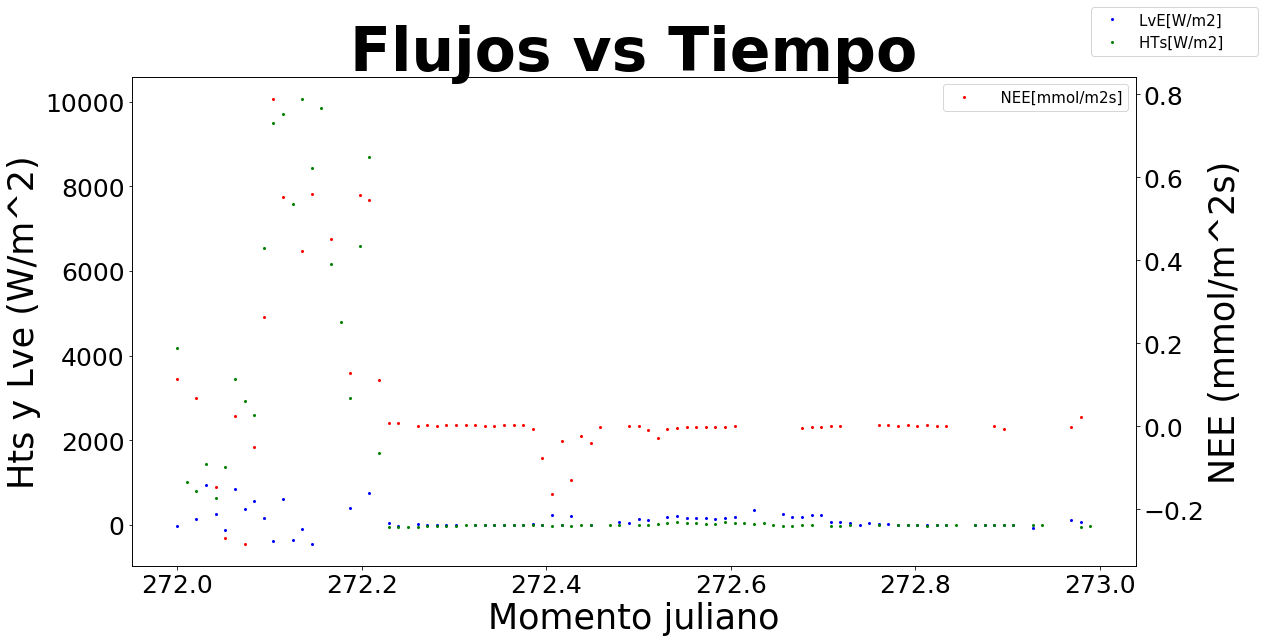

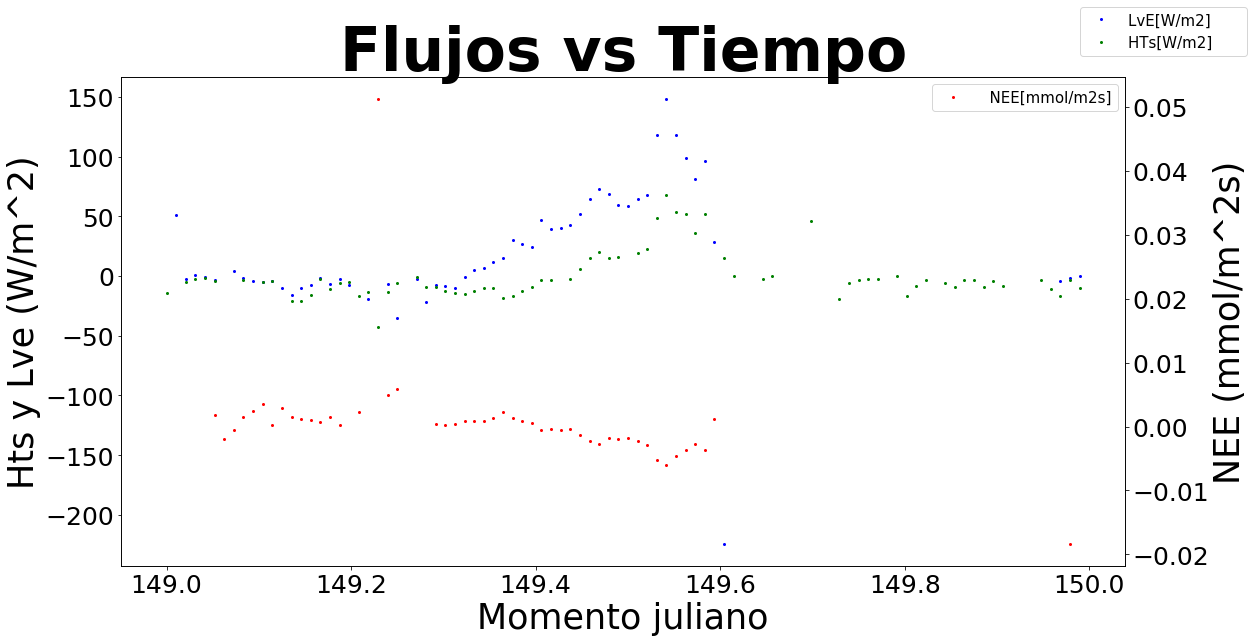

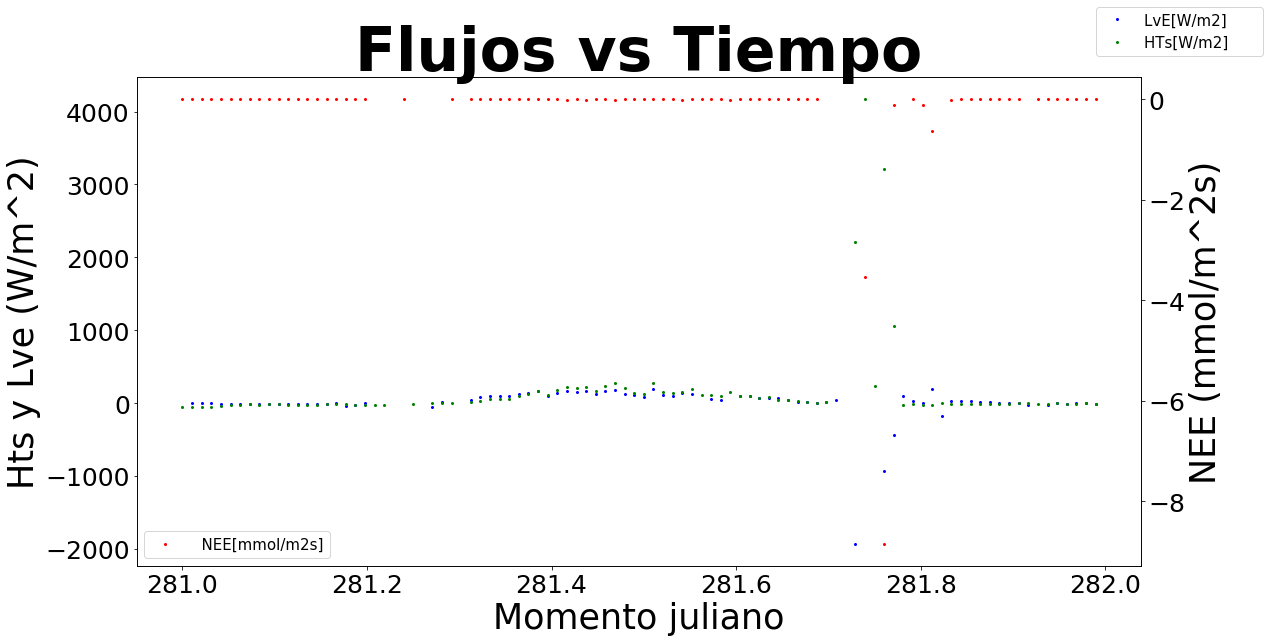

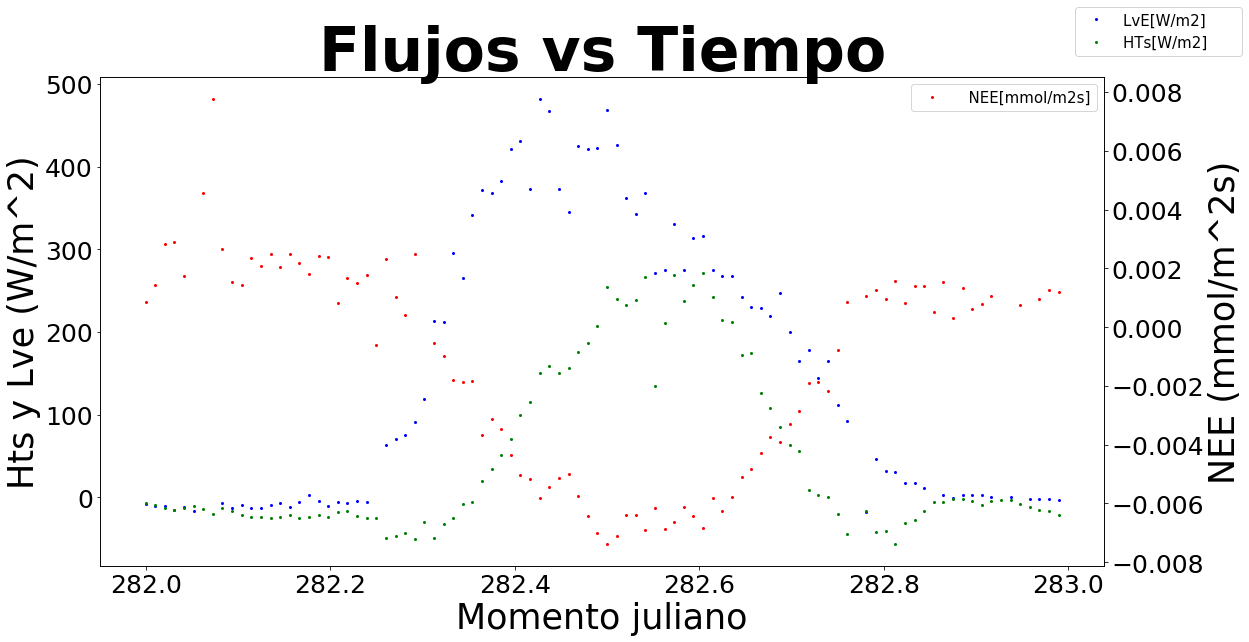

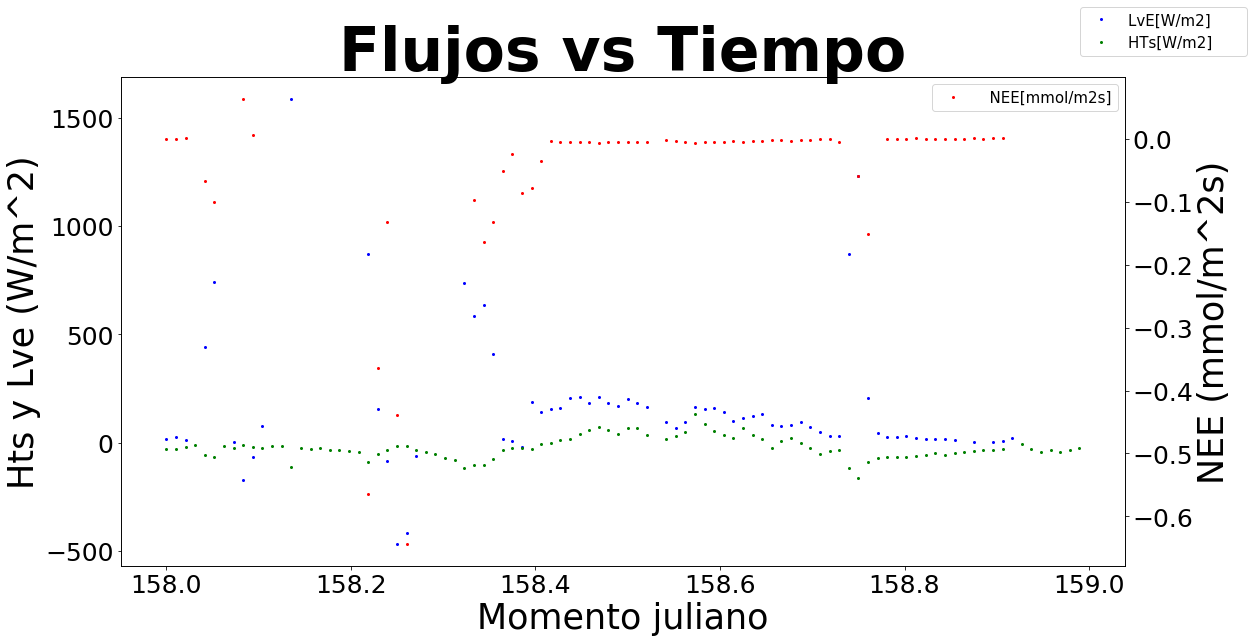

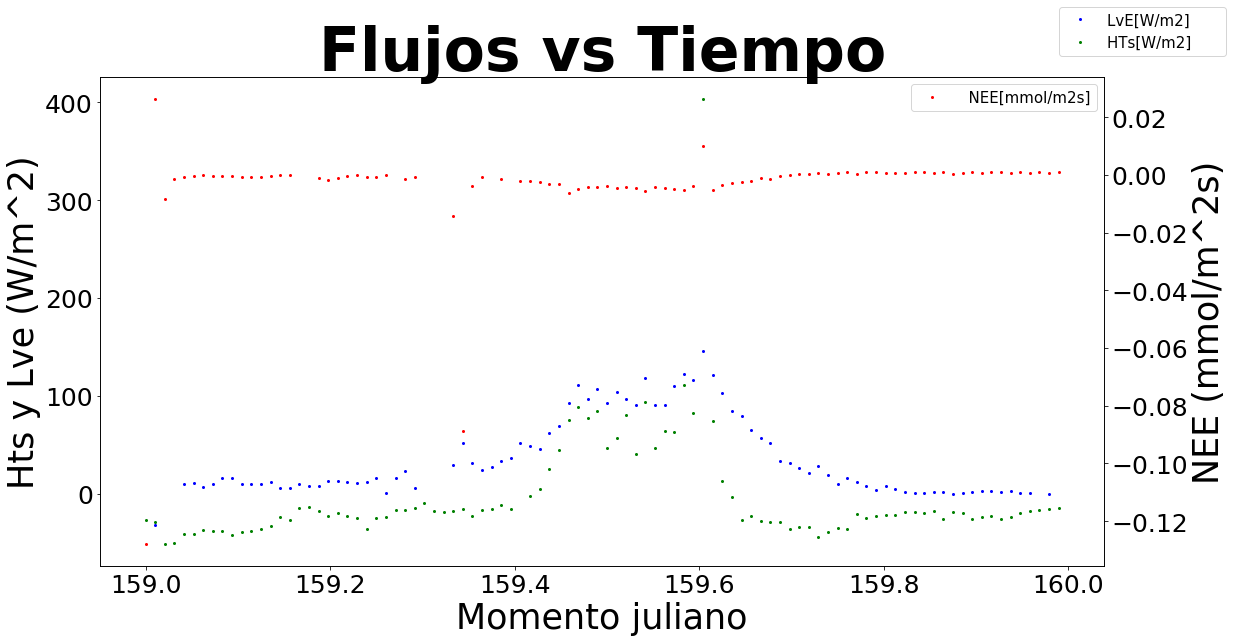

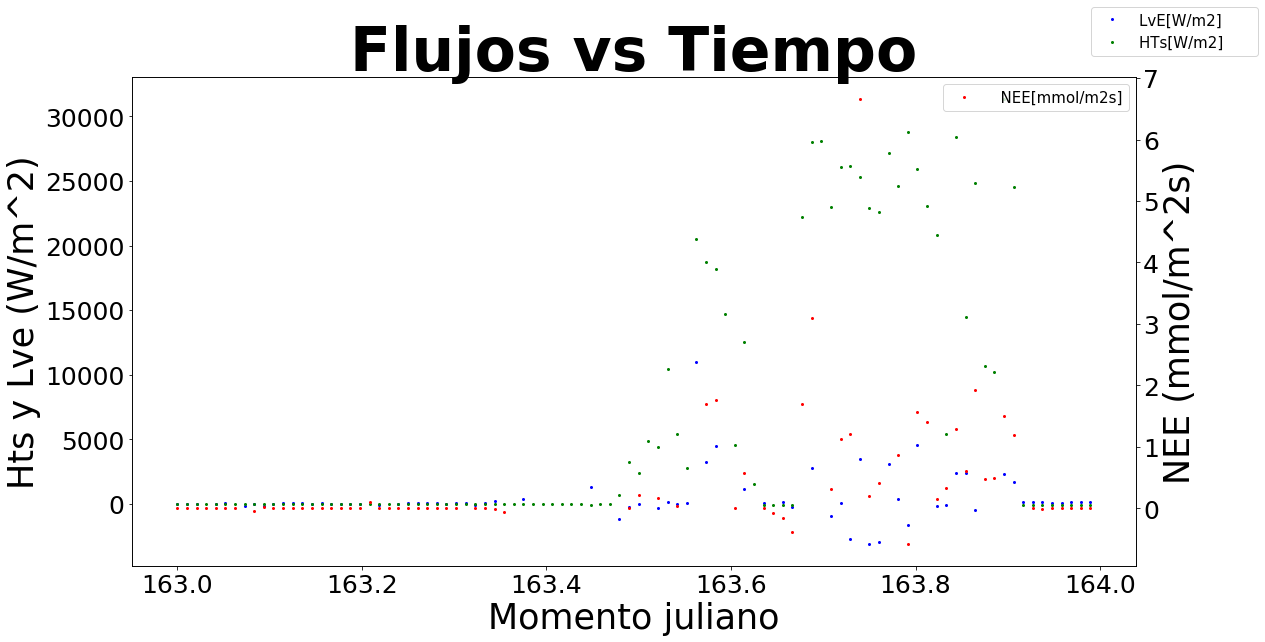

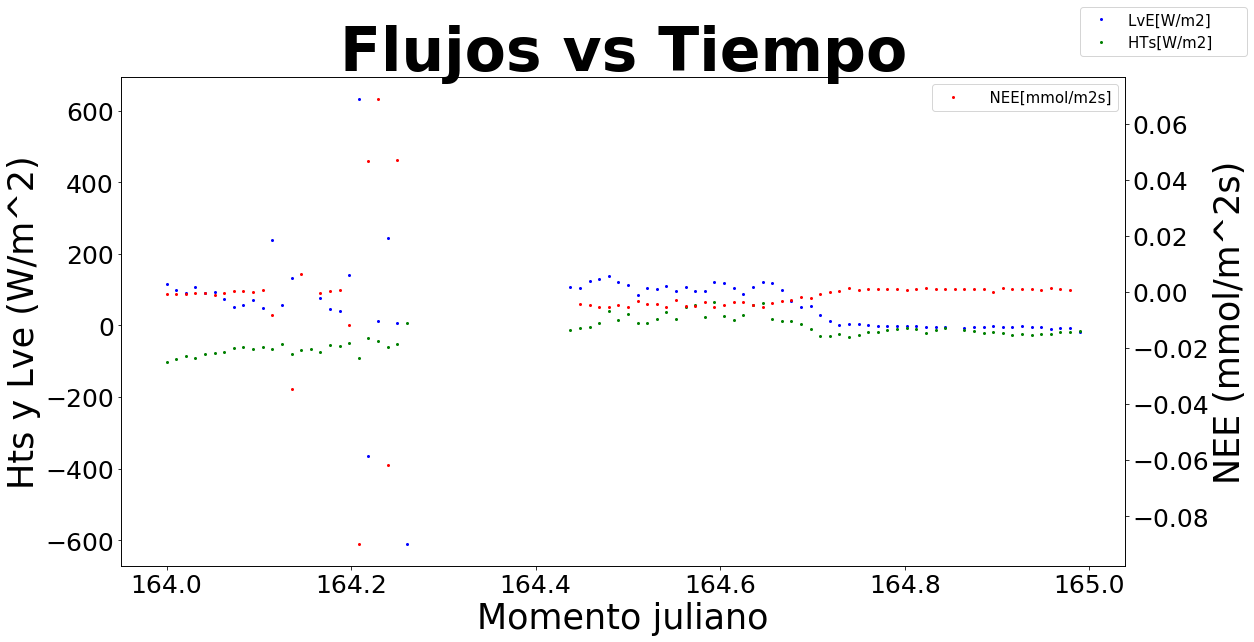

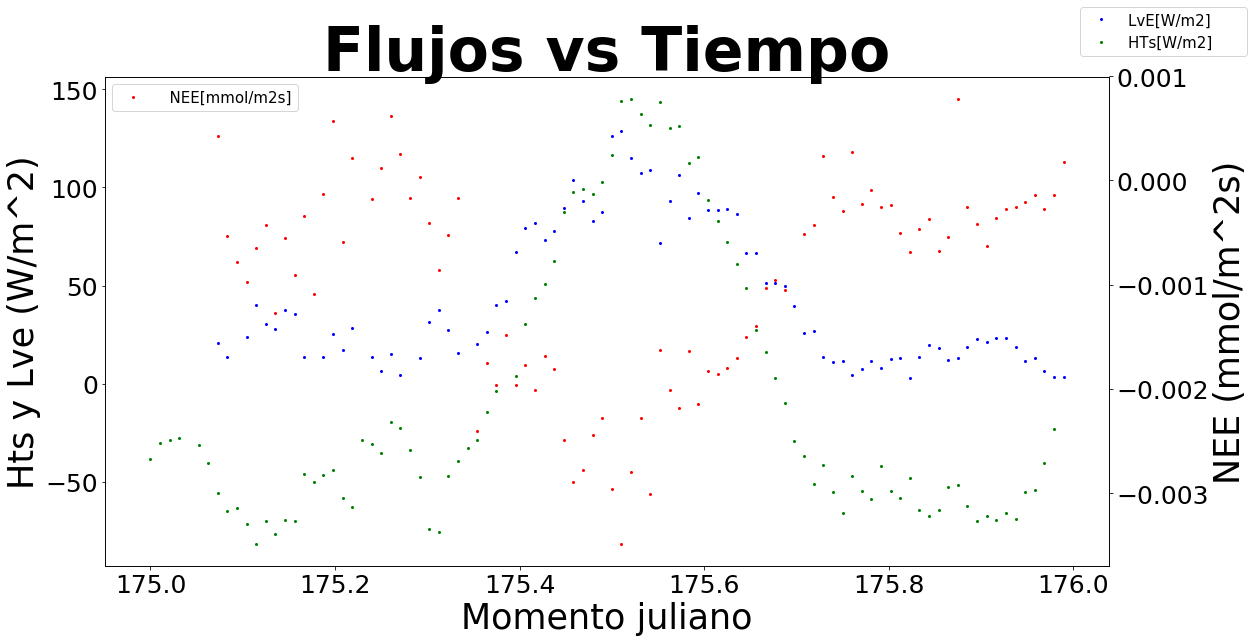

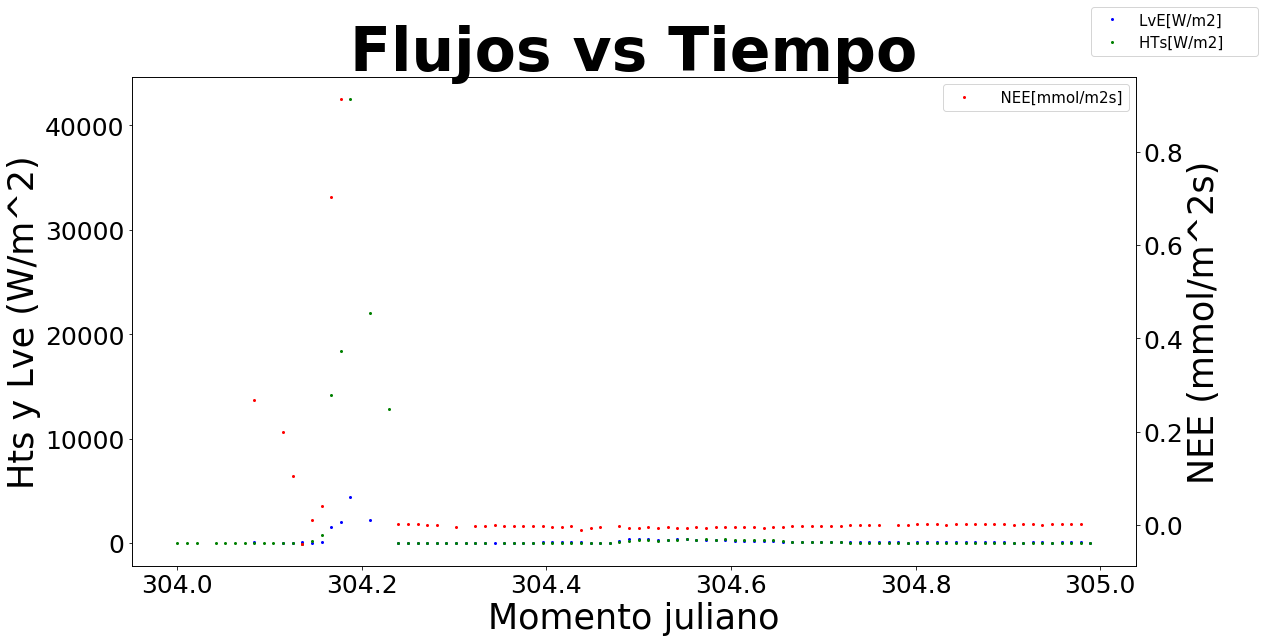

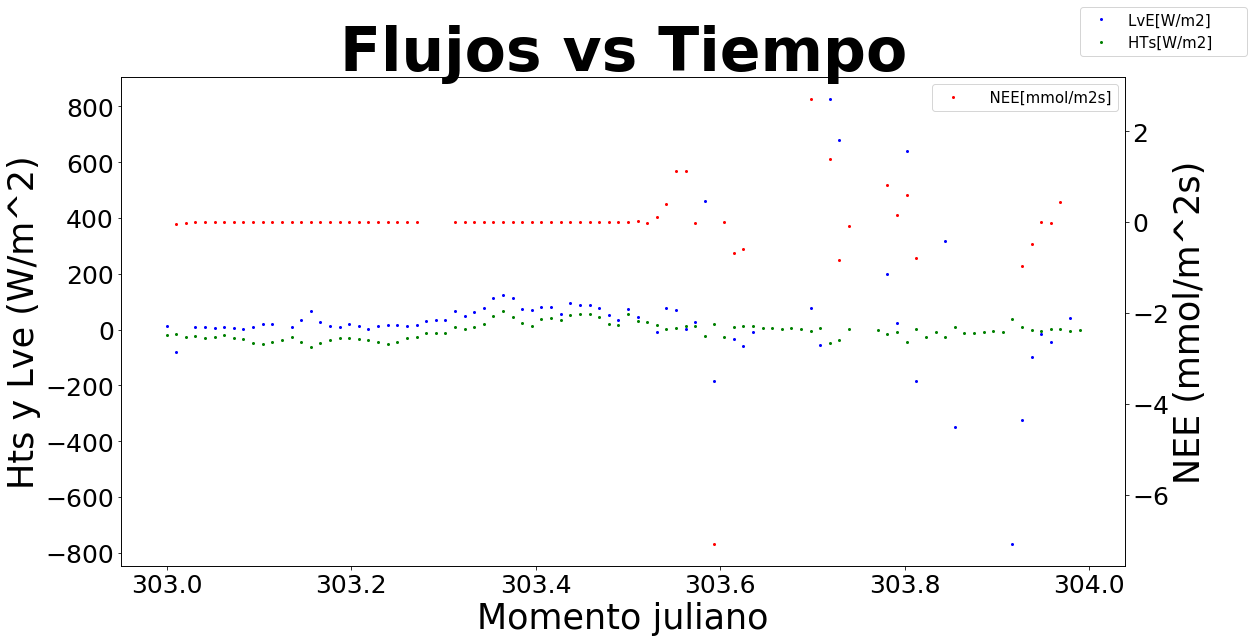

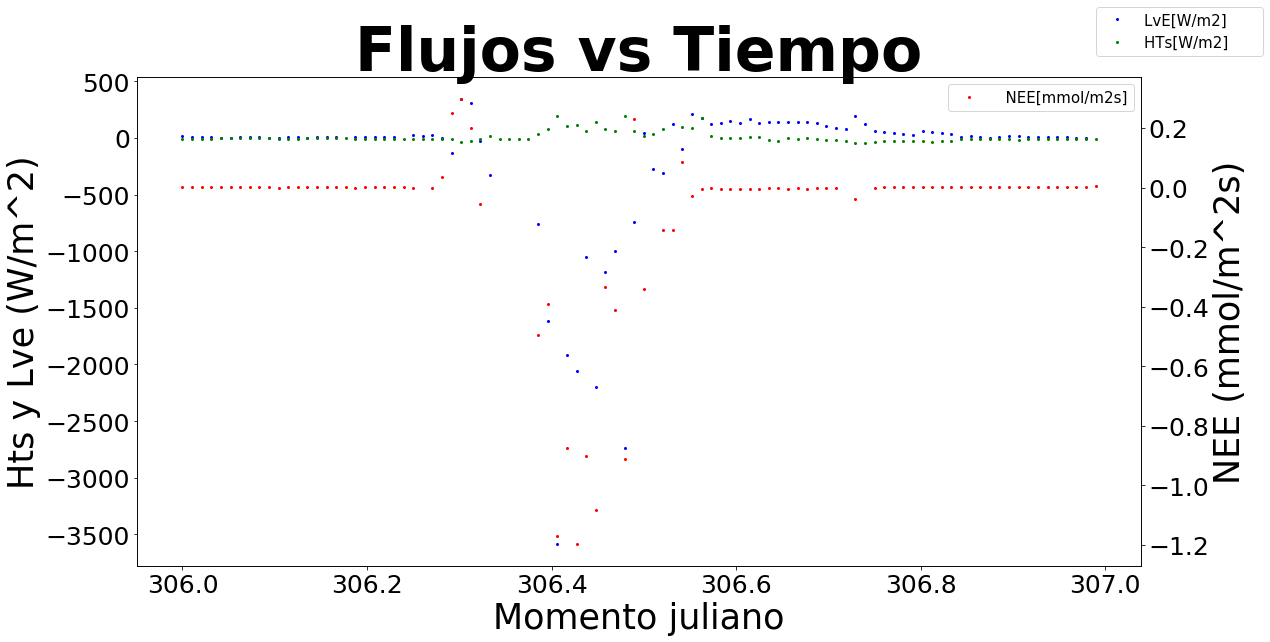

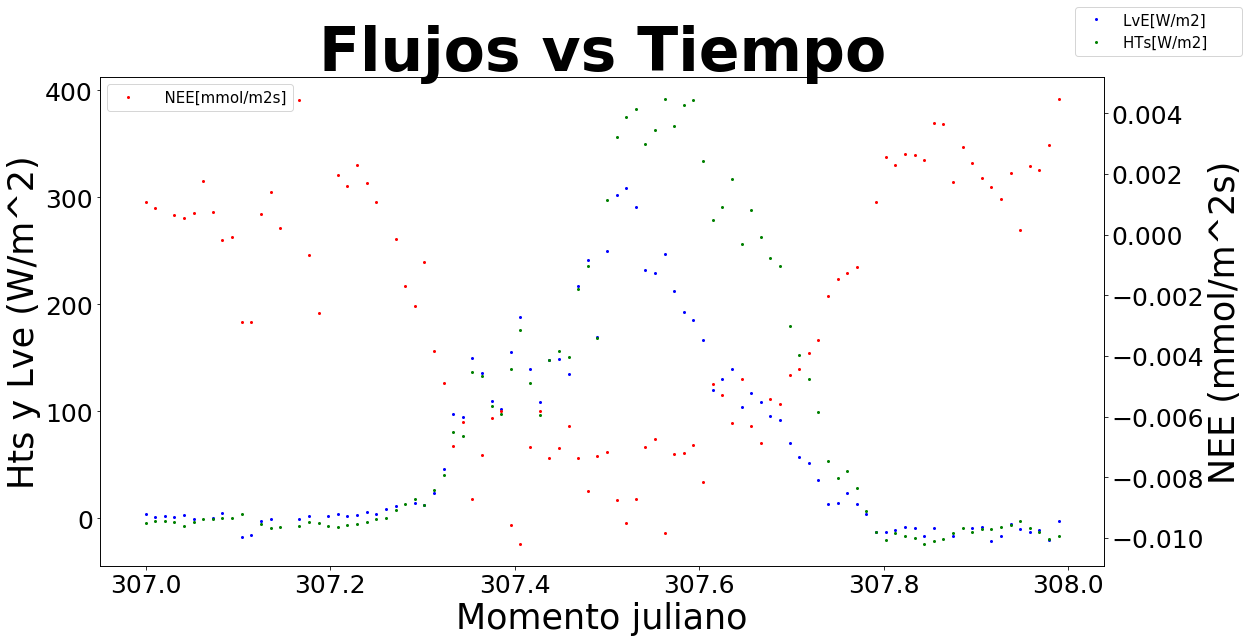

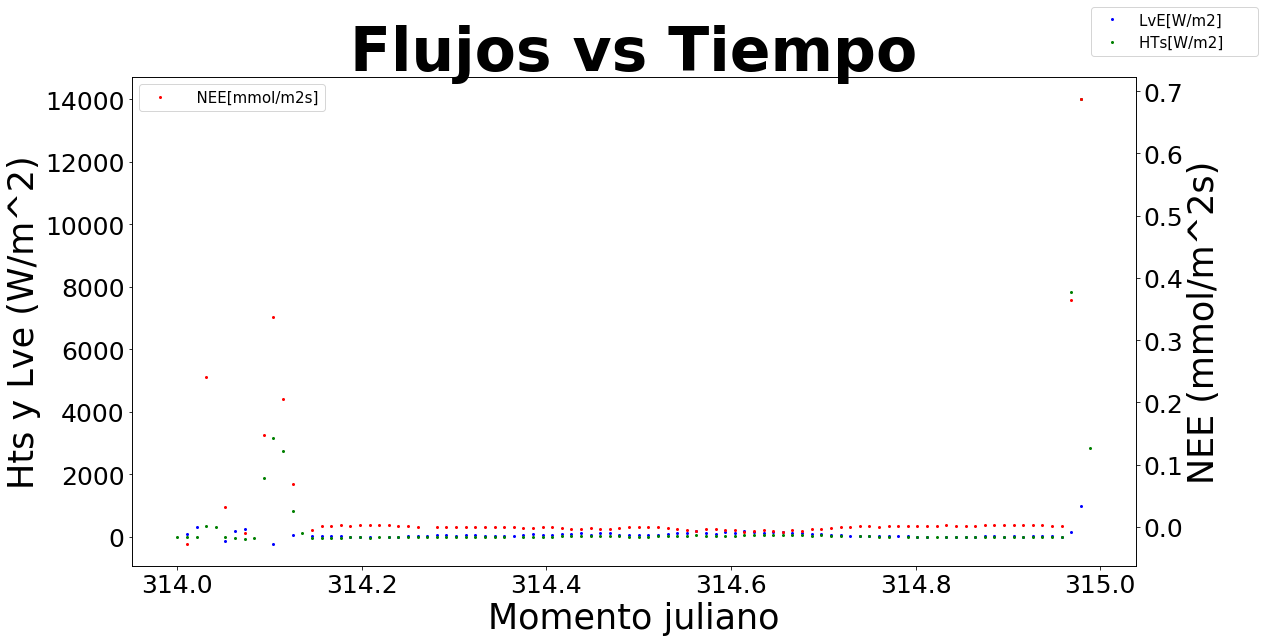

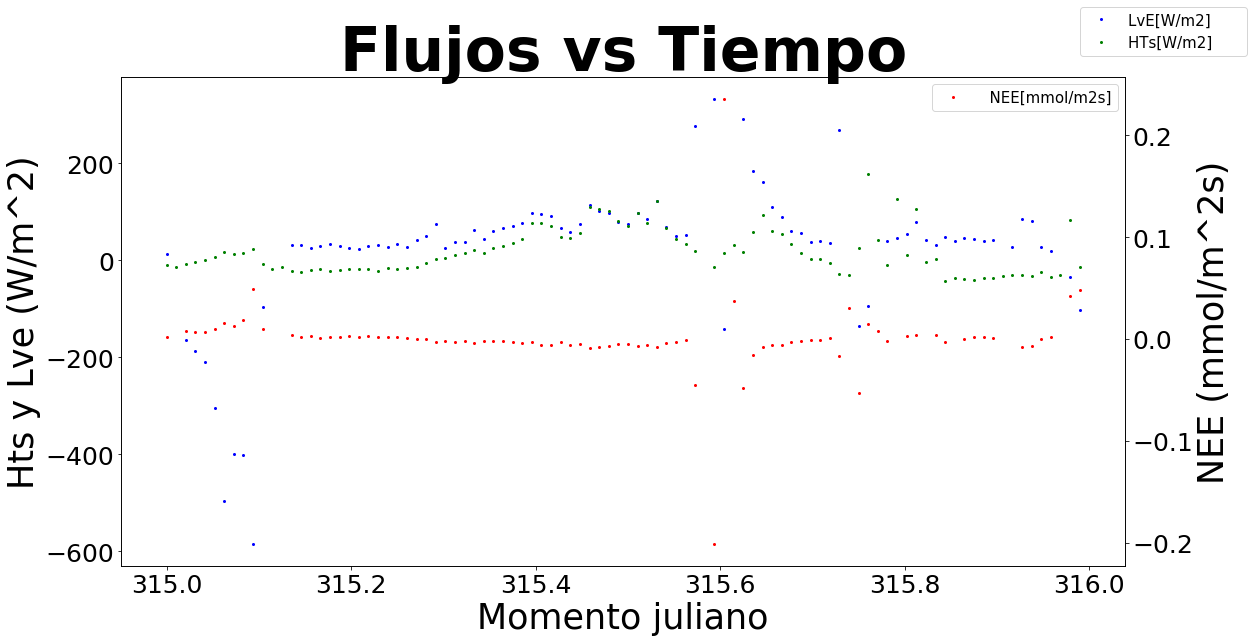

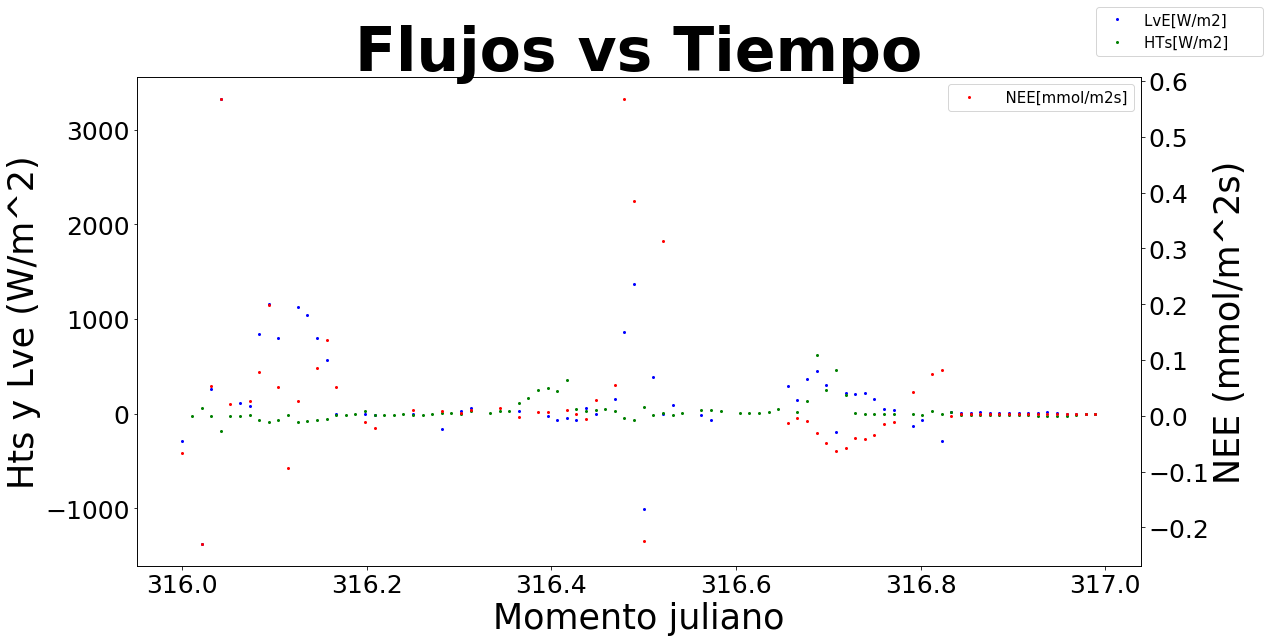

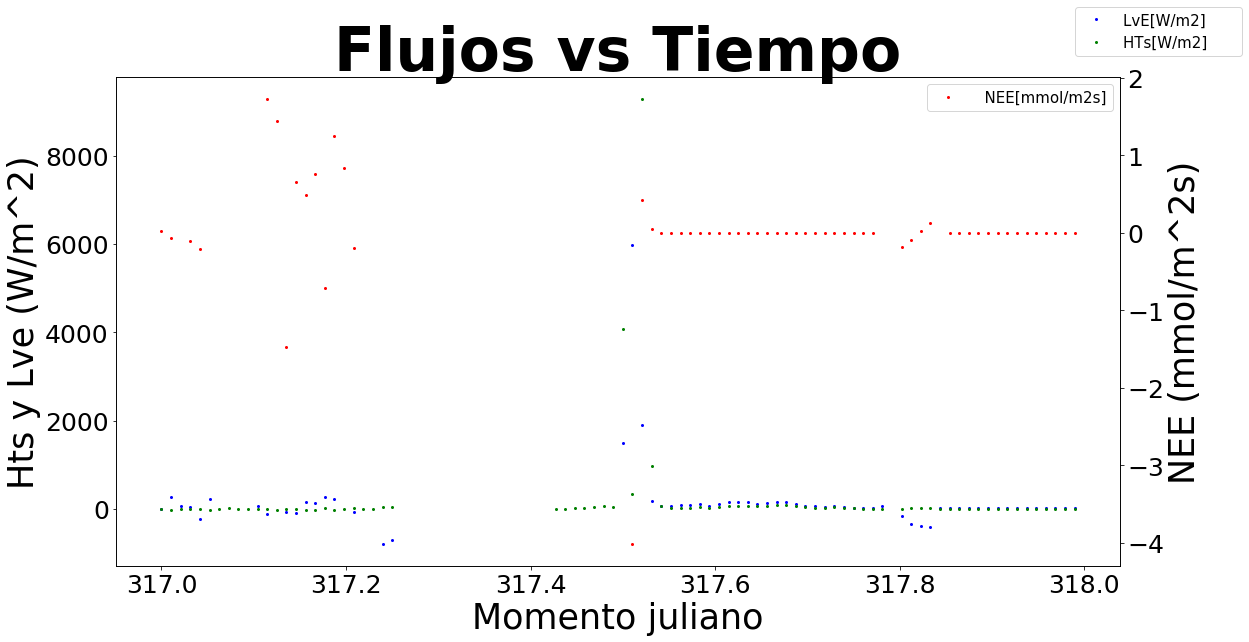

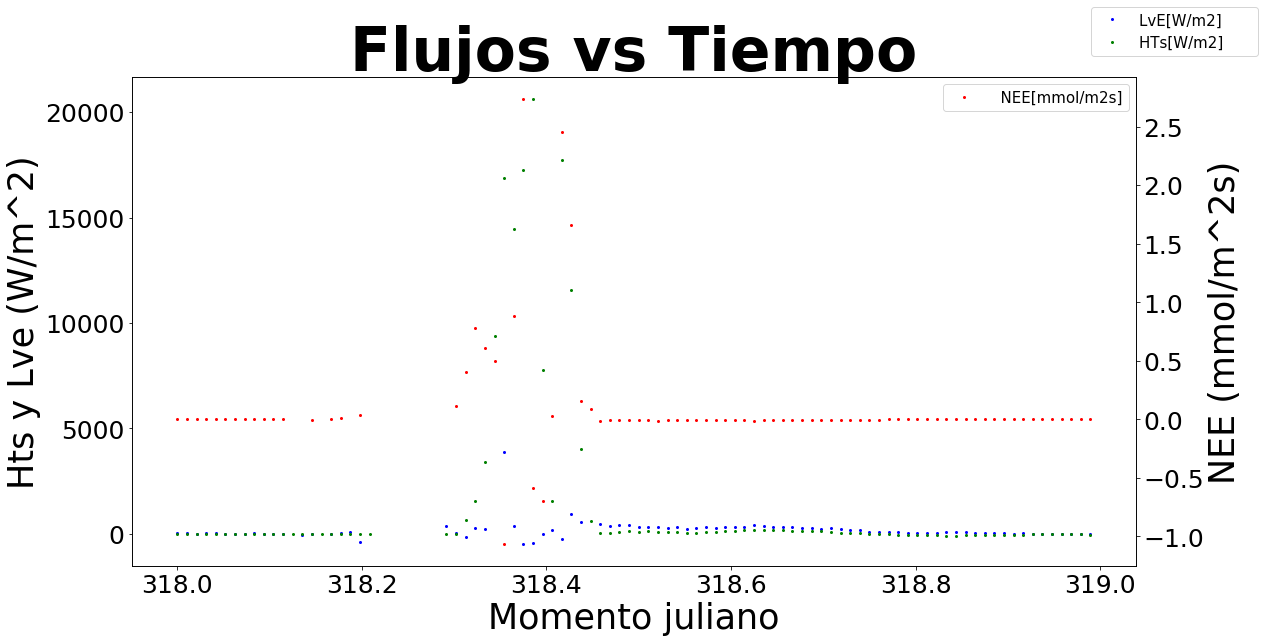

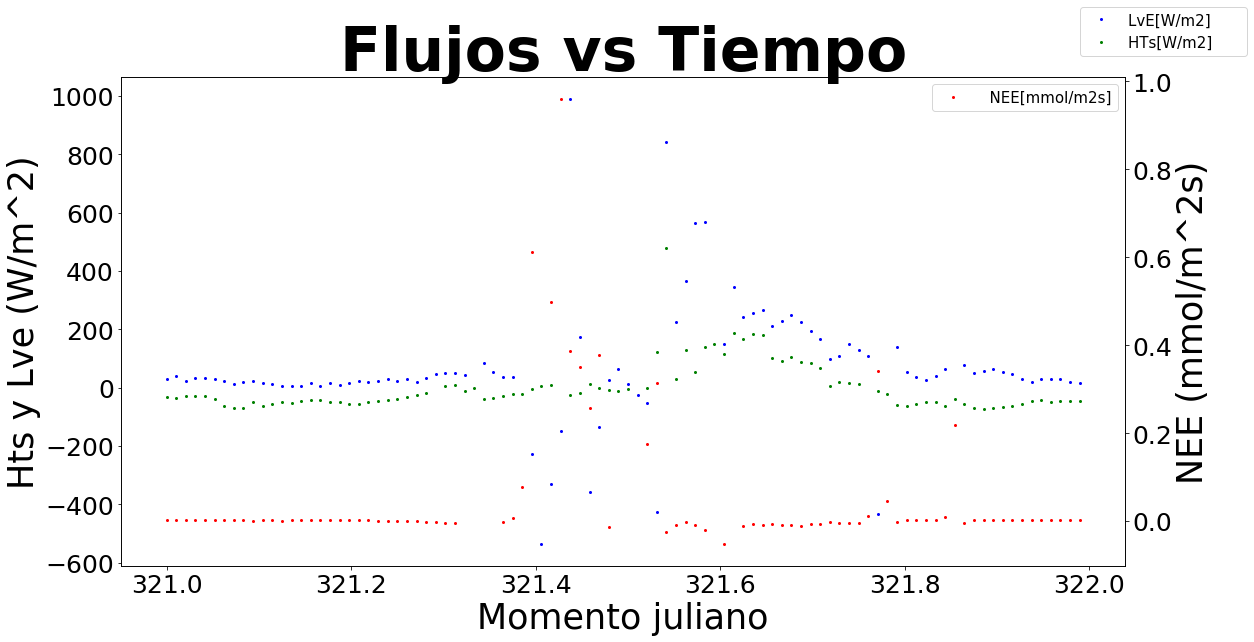

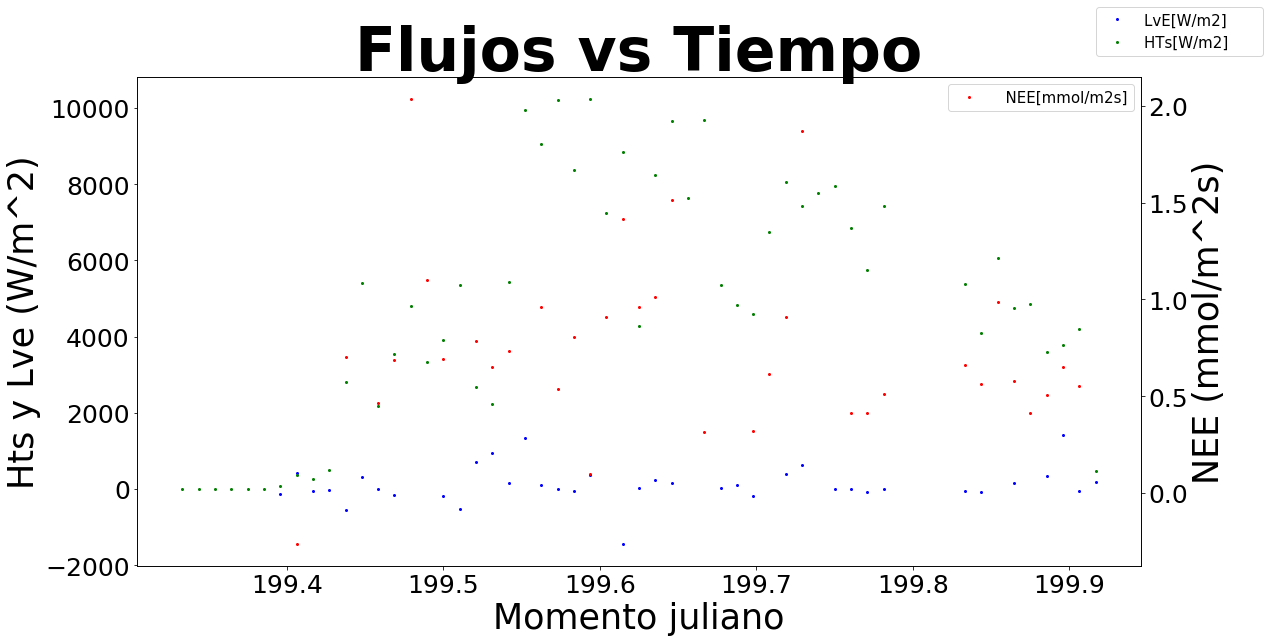

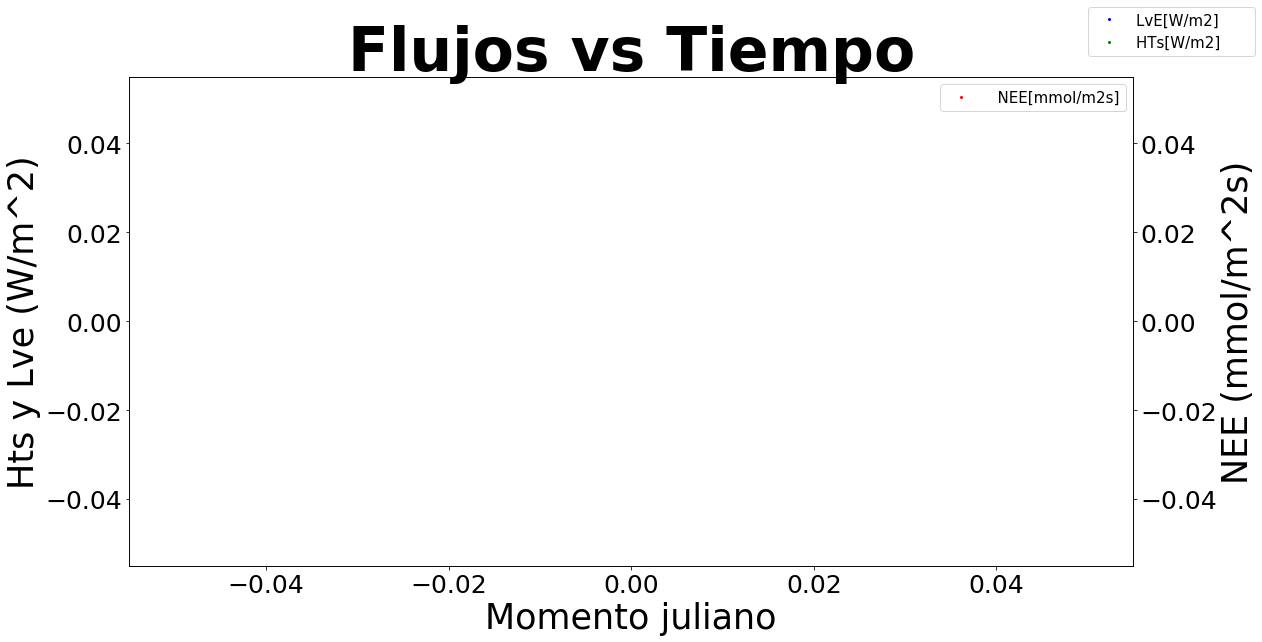

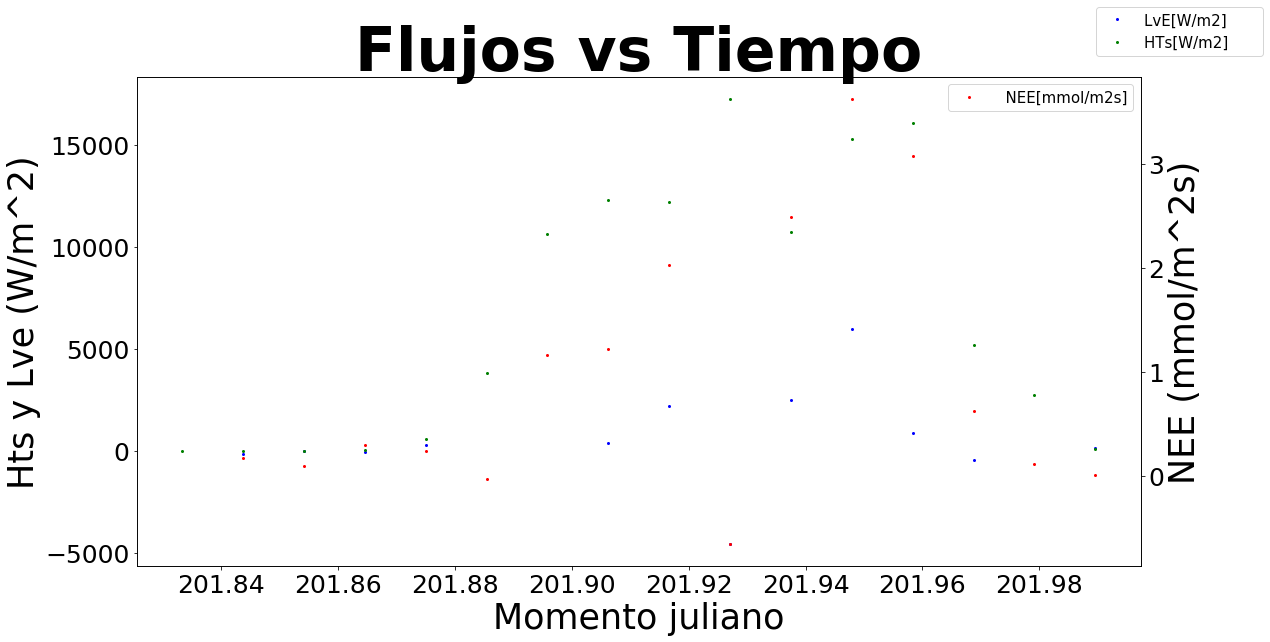

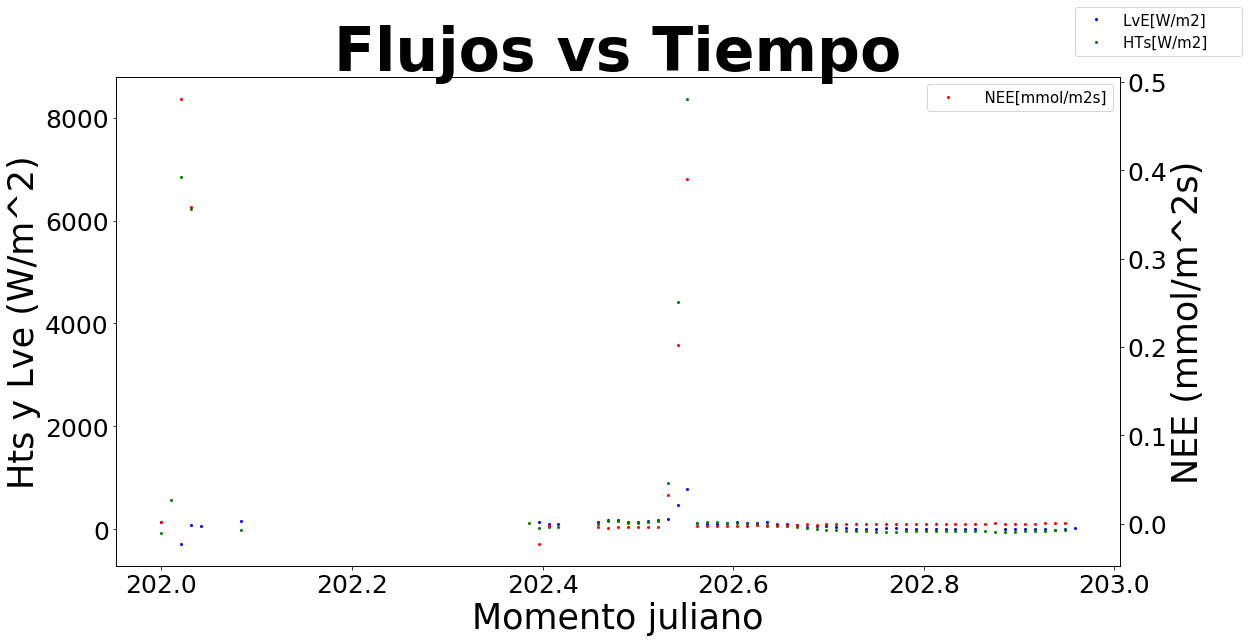

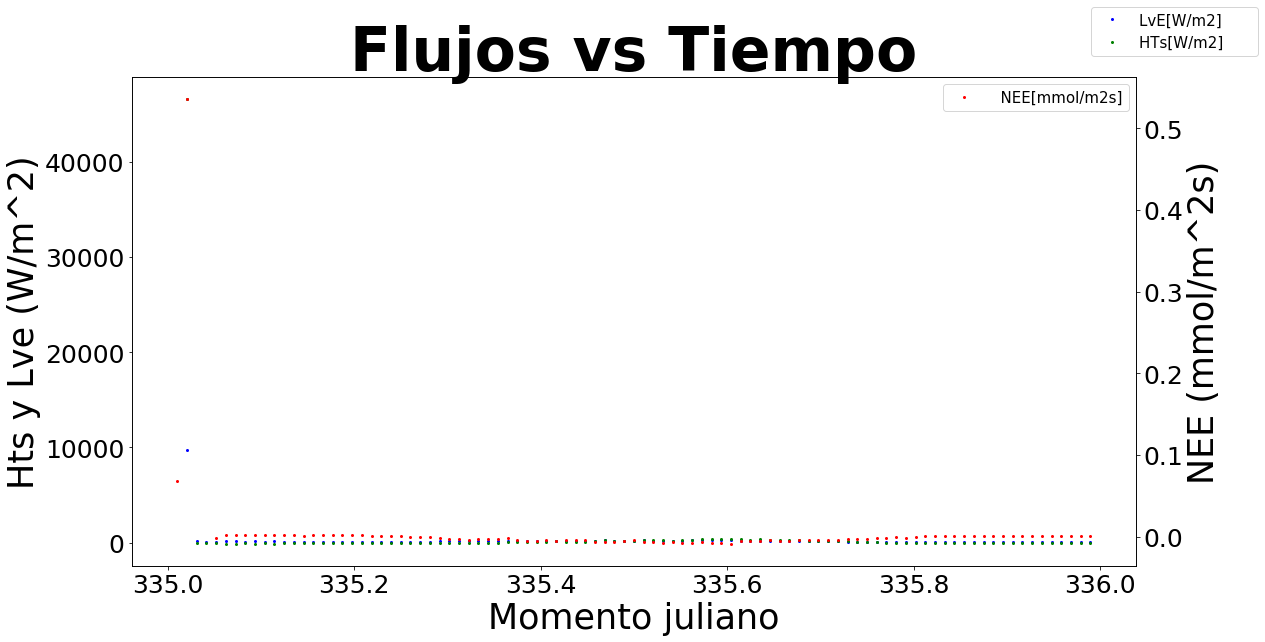

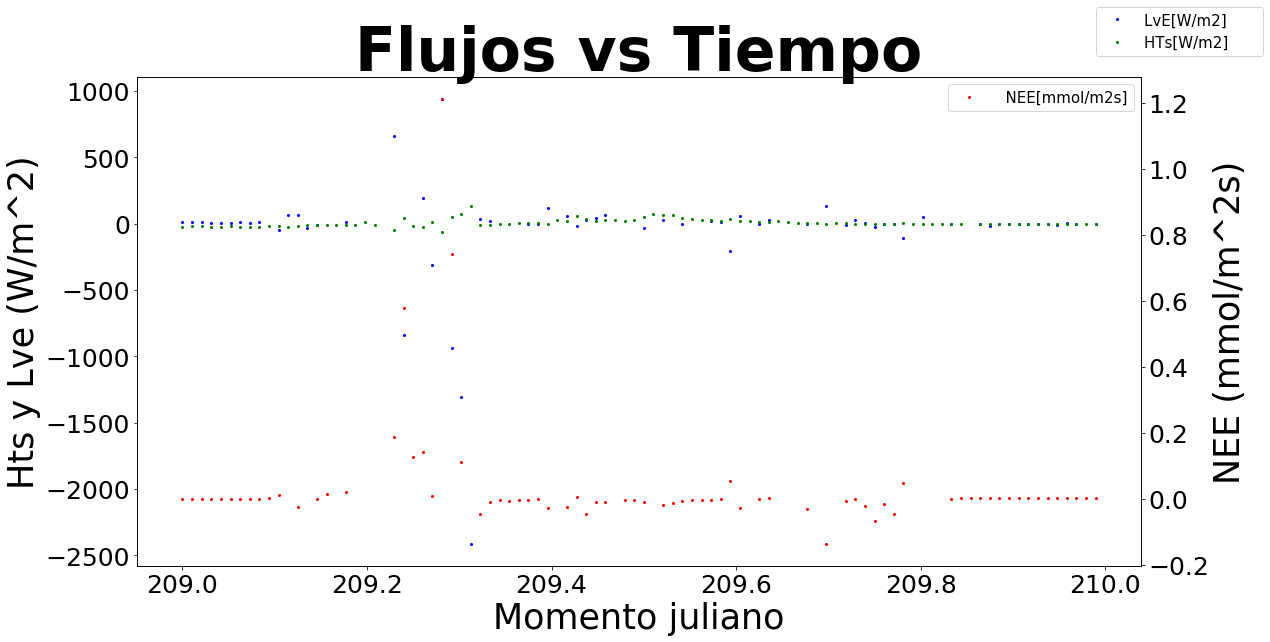

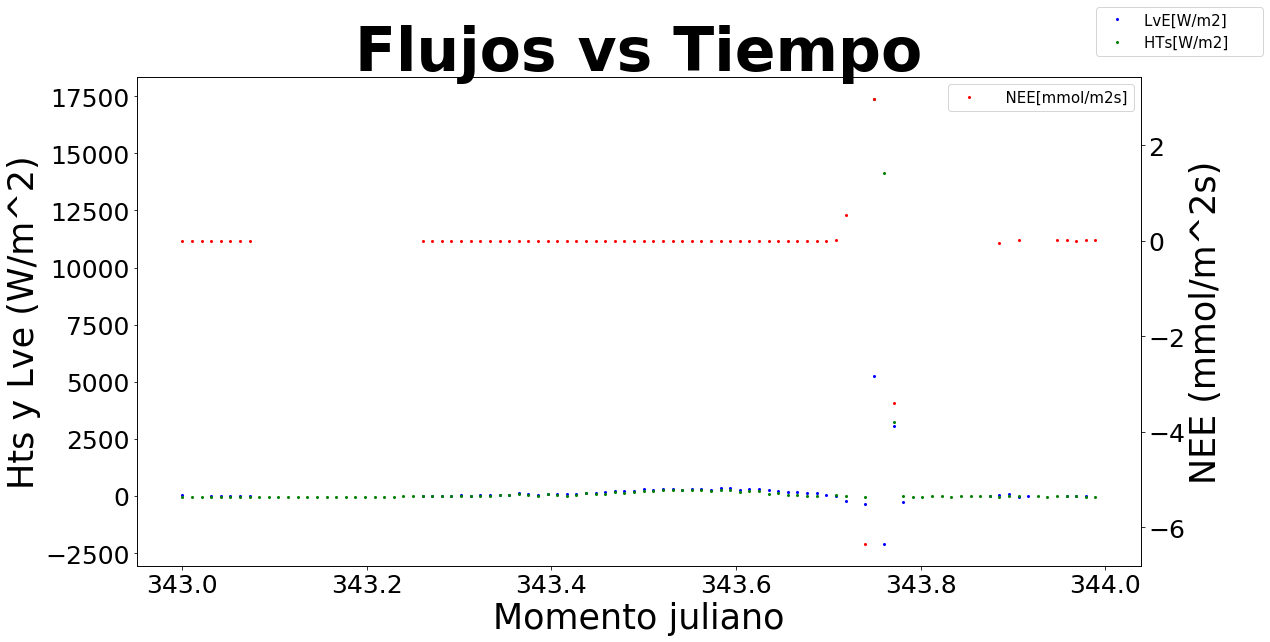

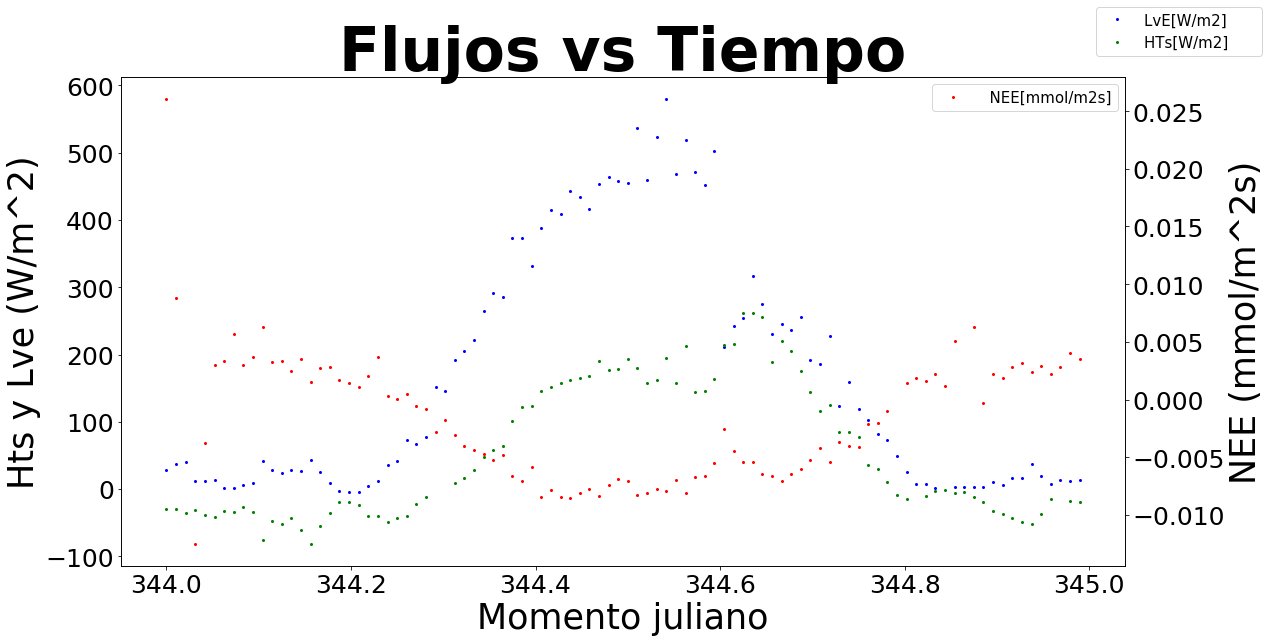

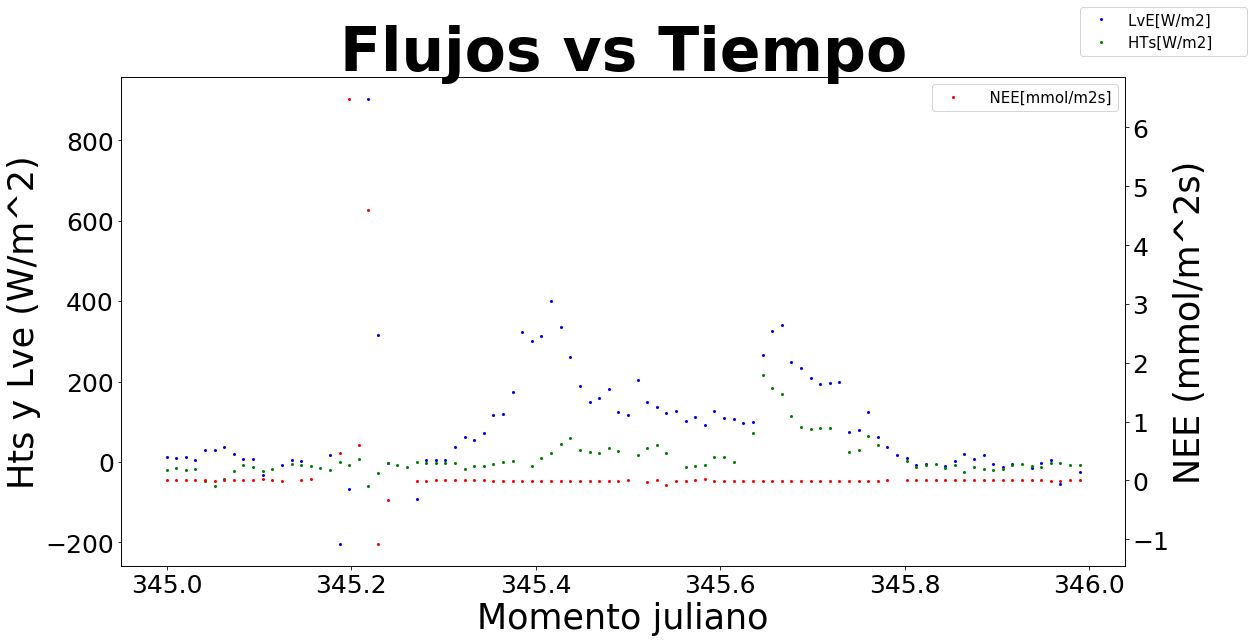

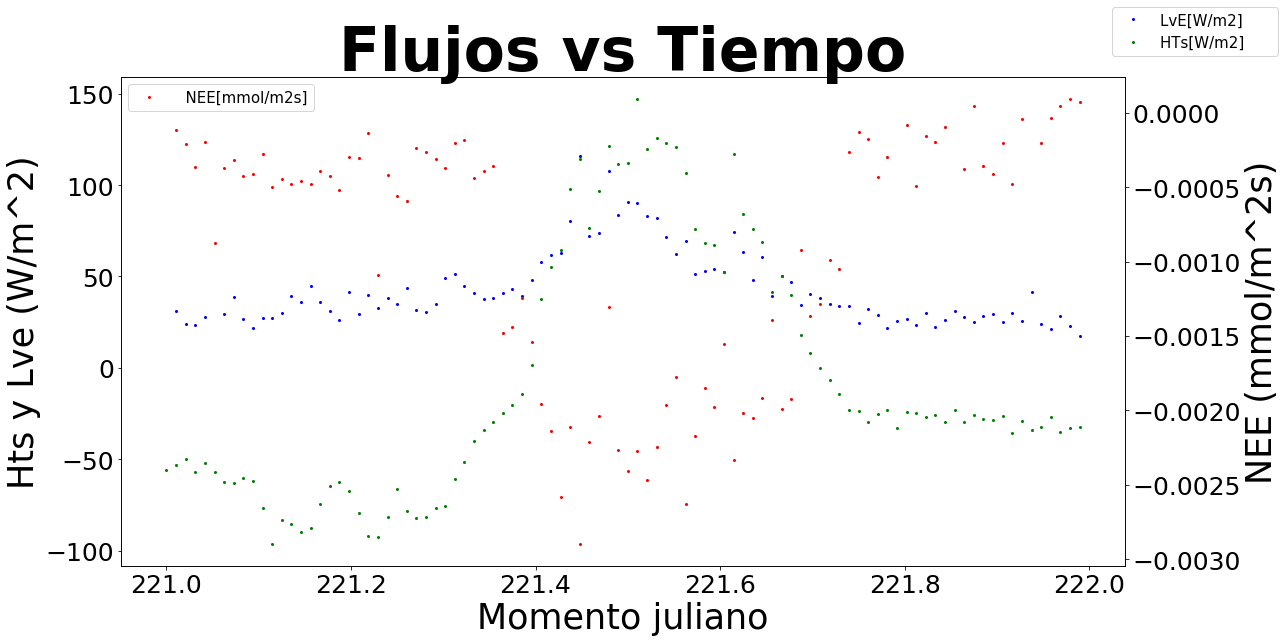

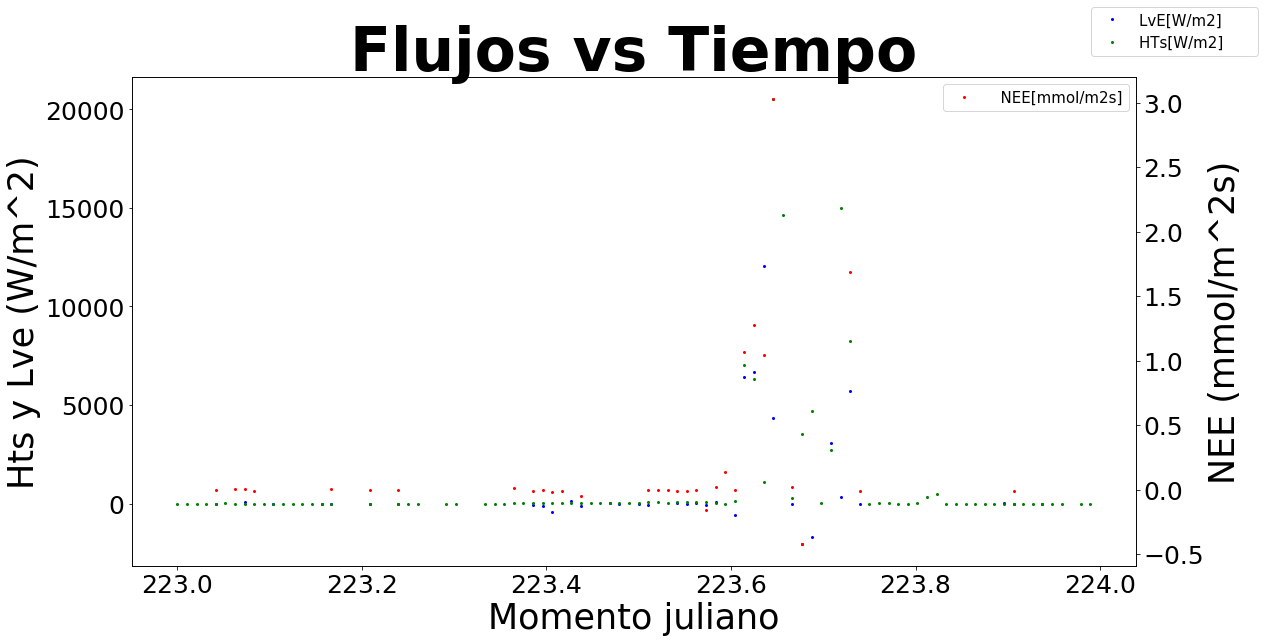

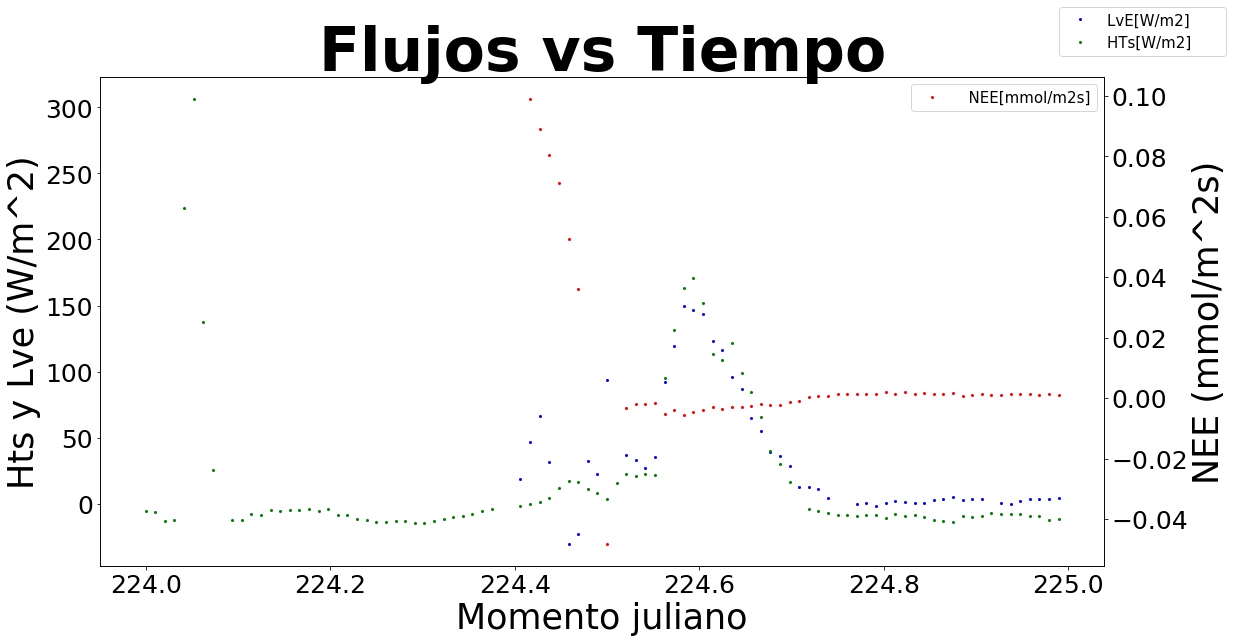

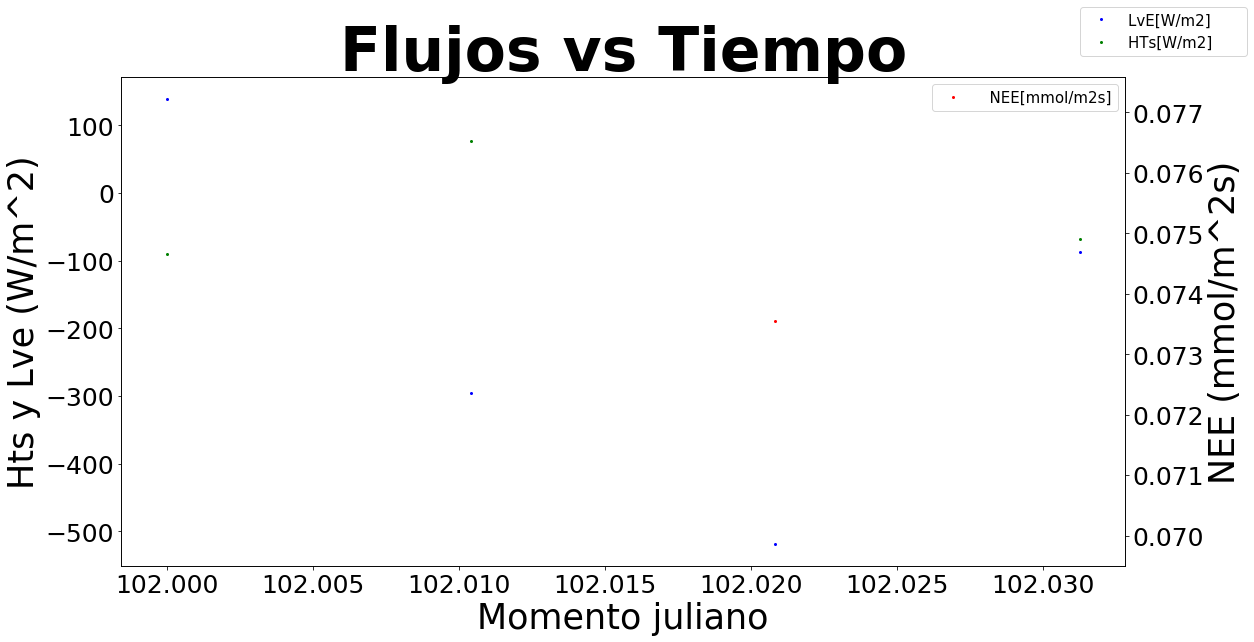

In [150]:
for i in dias_malos:
    grafico = datos[truncar(datos['Momento']) == i]
    fig, ax1 = plt.subplots(figsize = (18, 9))
    metadata('Flujos vs Tiempo', 'Momento juliano', 'Hts y Lve (W/m^2)')
    plt.plot(grafico['Momento'], grafico['LvE[W/m2]      '], 'bo', markersize = 2)
    plt.plot(grafico['Momento'], grafico['HTs[W/m2]      '], 'go', markersize = 2)   
    plt.figlegend(fontsize = 15)
    ax2 = ax1.twinx()
    ax2.set_ylabel('NEE (mmol/m^2s)', fontsize = 35)
    plt.yticks(fontsize = 25)
    ax2.plot(grafico['Momento'], grafico['  NEE[mmol/m2s]'], 'ro', markersize = 2)
    plt.legend(fontsize = 15)

In [158]:
momentos_malos = [259.5, 259.9, 261.8, 262.3,
                  265.4, 265.7, 271.6, 272.2,
                  281.7, 281.9, 158, 158.4,
                  163.4, 164, 164.1, 164.3,
                  304.1, 304.3, 303.5, 304,
                  306.2, 306.6, 314, 314.2,
                  315, 315.2, 316, 316.2,
                  316.4, 316.6, 317.4, 317.6,
                  318.2, 318.5, 321.3, 321.7,
                  199.4, 200, 201.8, 202,
                  335, 335.1, 209.1, 209.4,
                  343.7, 343.8, 345.1, 345.3,
                  223.6, 223.8
                 ]

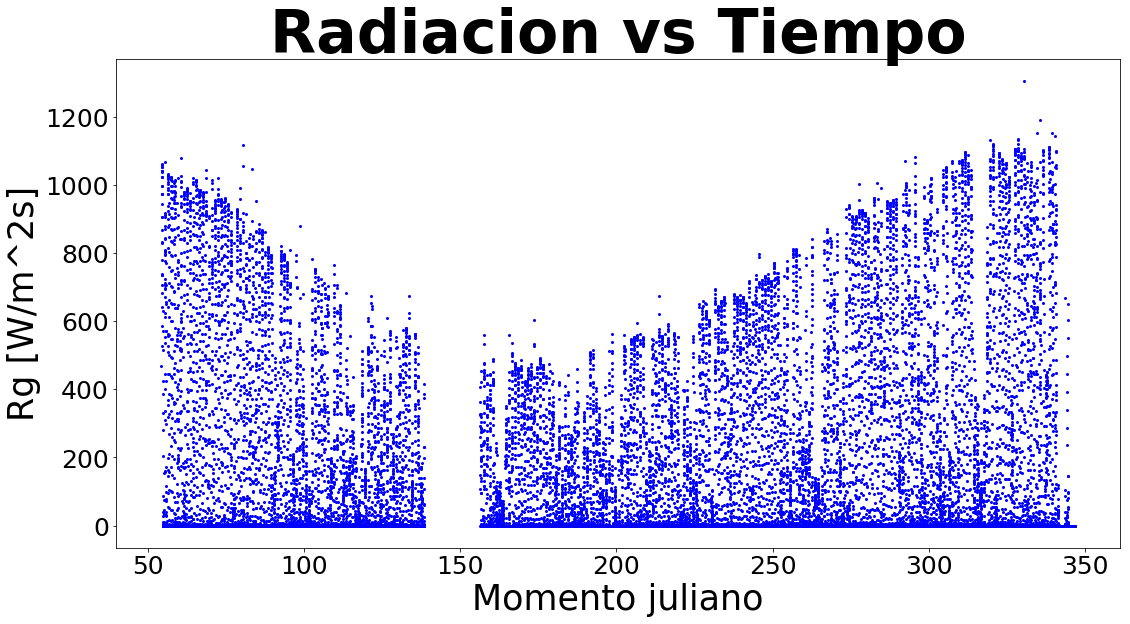

In [153]:
plt.figure(figsize = (18, 9))
metadata('Radiacion vs Tiempo', 'Momento juliano', 'Rg [W/m^2s]')
plt.plot(datos['Momento'], datos['RG'], 'bo', markersize = 2)

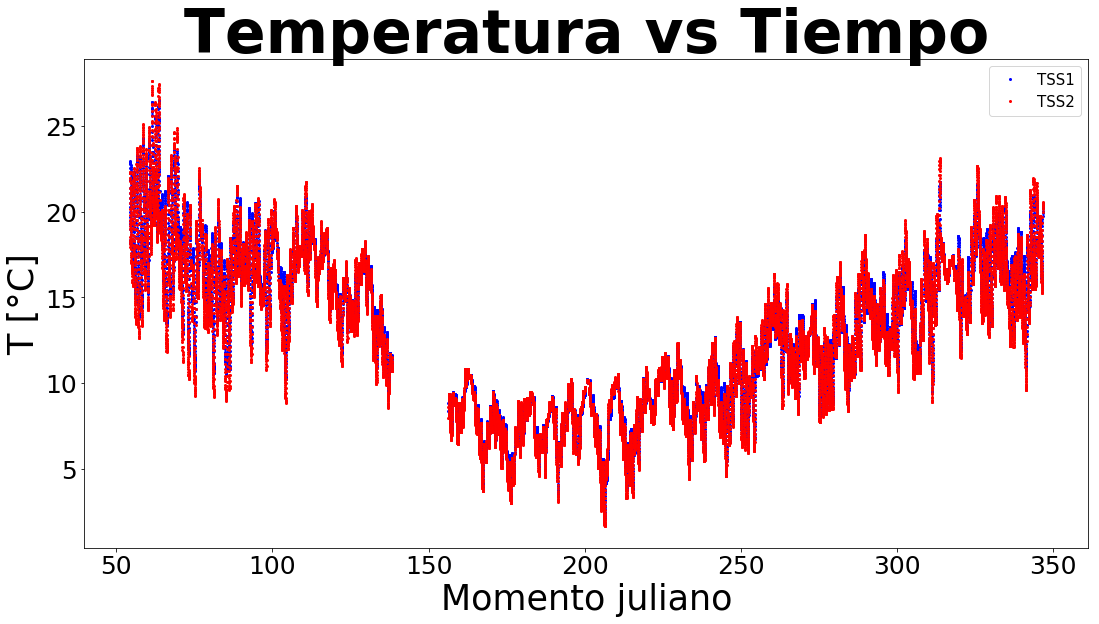

In [155]:
plt.figure(figsize = (18, 9))
metadata('Temperatura vs Tiempo', 'Momento juliano', 'T [°C]')
plt.plot(datos['Momento'], datos['TSS1'], 'bo', markersize = 2)
plt.plot(datos['Momento'], datos['TSS2'], 'ro', markersize = 2)
plt.legend(fontsize = 15)

(305, 325)

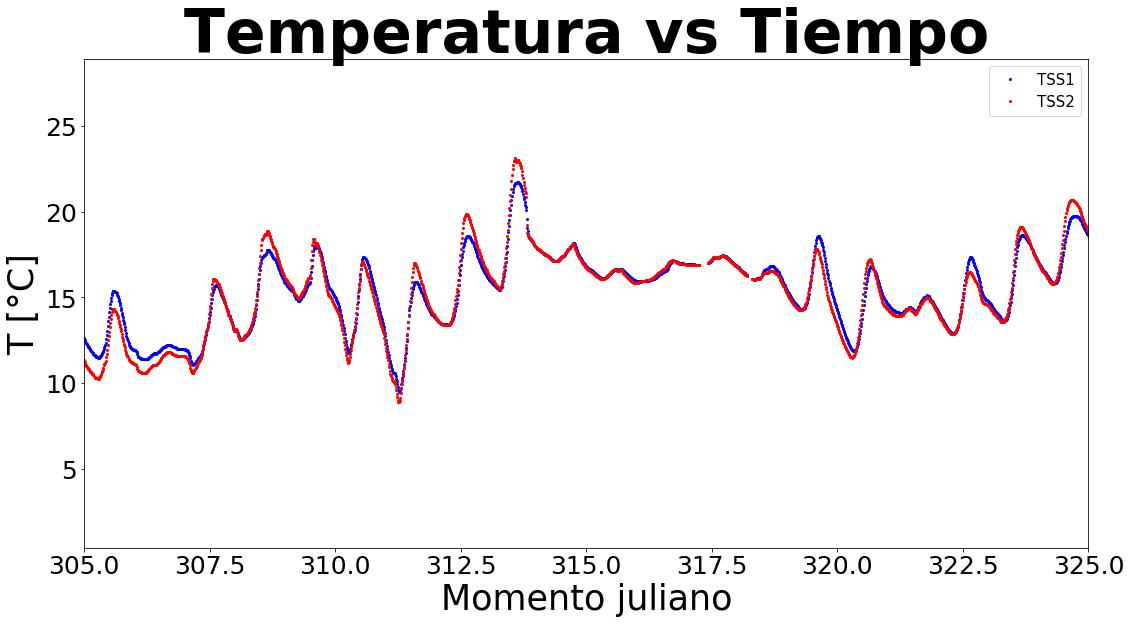

In [157]:
plt.figure(figsize = (18, 9))
metadata('Temperatura vs Tiempo', 'Momento juliano', 'T [°C]')
plt.plot(datos['Momento'], datos['TSS1'], 'bo', markersize = 2)
plt.plot(datos['Momento'], datos['TSS2'], 'ro', markersize = 2)
plt.legend(fontsize = 15)
plt.xlim(305, 325)

In [167]:
iterador = np.arange(0, len(momentos_malos), 2)
col = ['  NEE[mmol/m2s]', 'LvE[W/m2]      ', 'HTs[W/m2]      ']
for i in col:
    print(i)
    for j in iterador:
        desde = momentos_malos[j]
        hasta = momentos_malos[j + 1]
        datos.loc[
            (datos['Momento'] < hasta) & (datos['Momento'] > desde)
            , i
            ] = np.nan

  NEE[mmol/m2s]
LvE[W/m2]      
HTs[W/m2]      


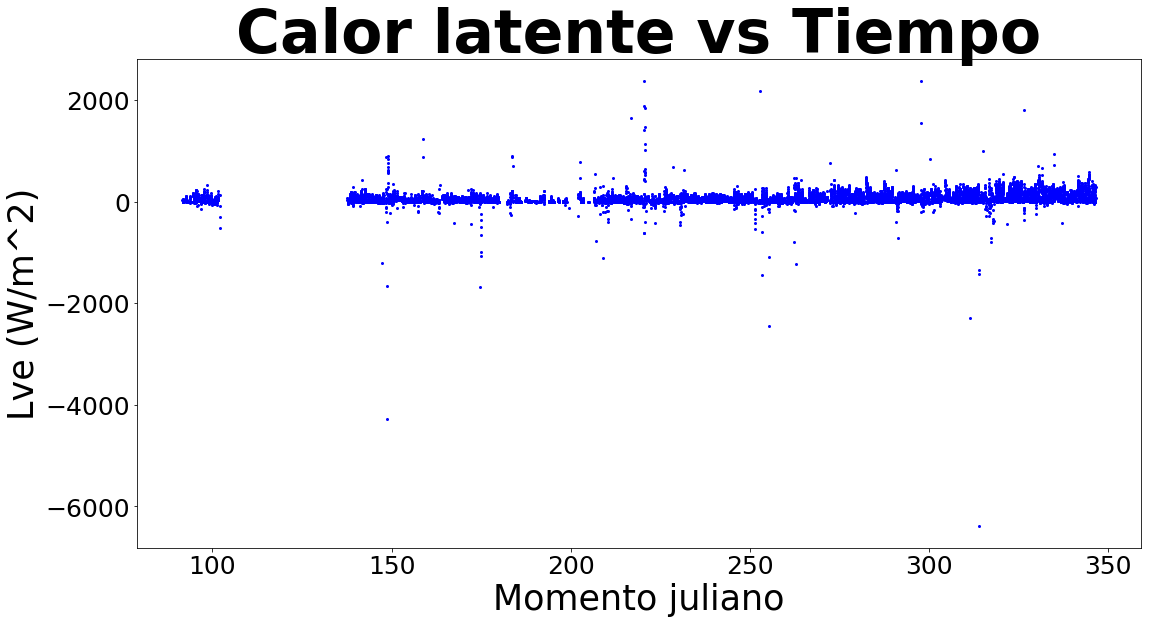

In [168]:
plt.figure(figsize = (18, 9))
metadata('Calor latente vs Tiempo', 'Momento juliano', 'Lve (W/m^2)')
plt.plot(datos['Momento'], datos['LvE[W/m2]      '], 'bo', markersize = 2)

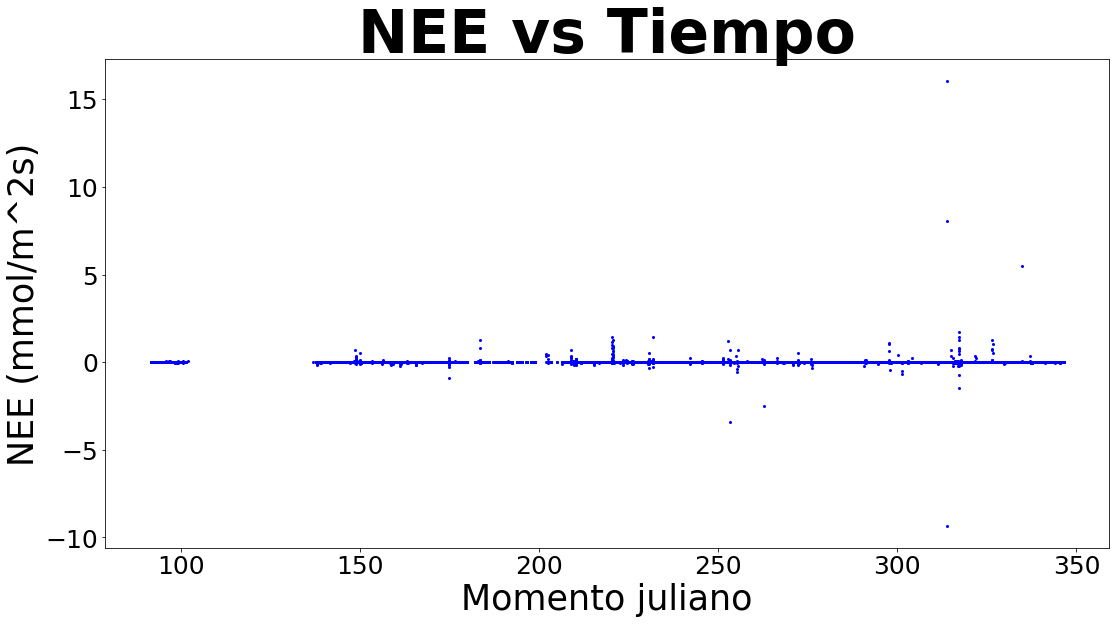

In [171]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos['Momento'], datos['  NEE[mmol/m2s]'], 'bo', markersize = 2)

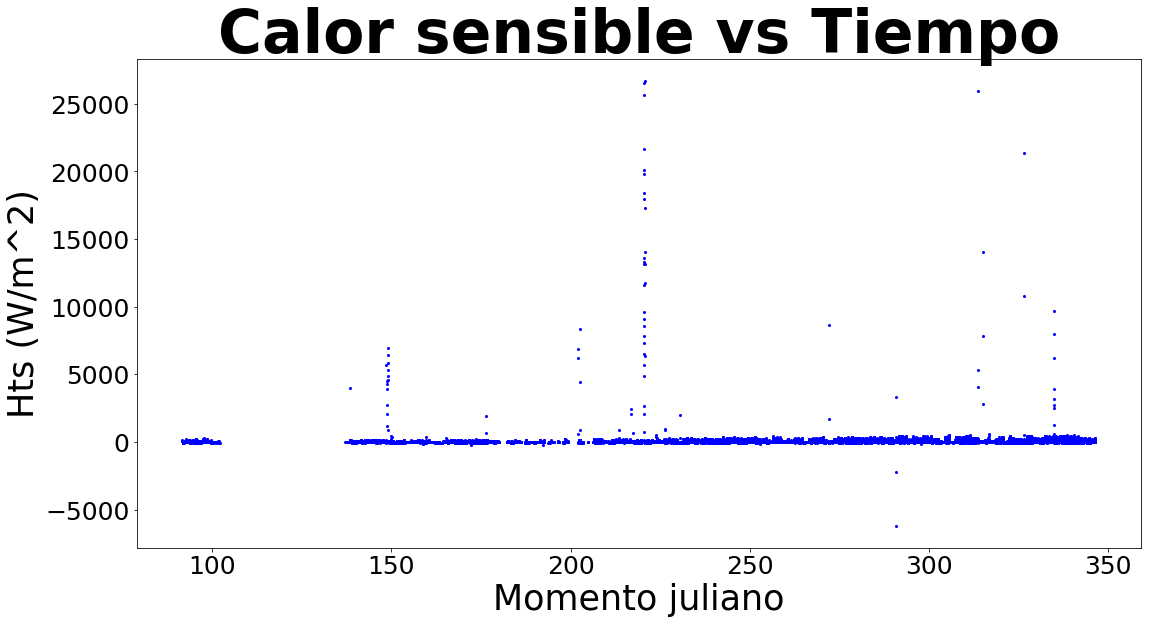

In [184]:
plt.figure(figsize = (18, 9))
metadata('Calor sensible vs Tiempo', 'Momento juliano', 'Hts (W/m^2)')
plt.plot(datos['Momento'], datos['HTs[W/m2]      '], 'bo', markersize = 2)
#plt.ylim(-0.01, 0.01)
#plt.ylim(-2, 2)
#plt.xlim(310, 345)

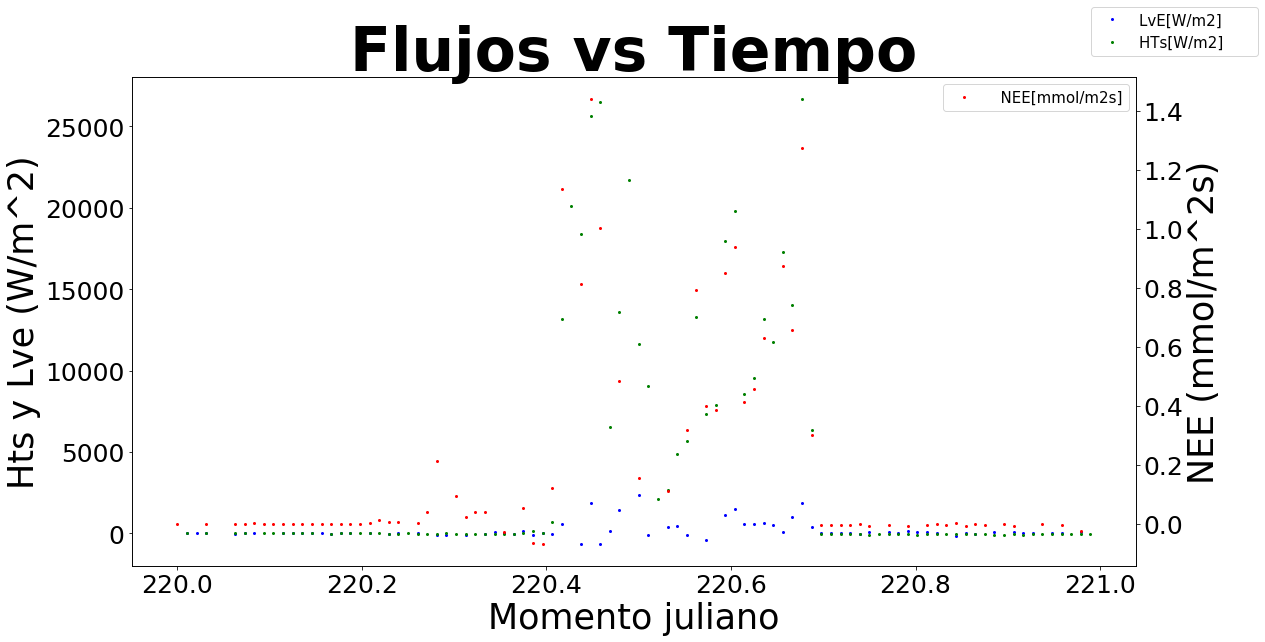

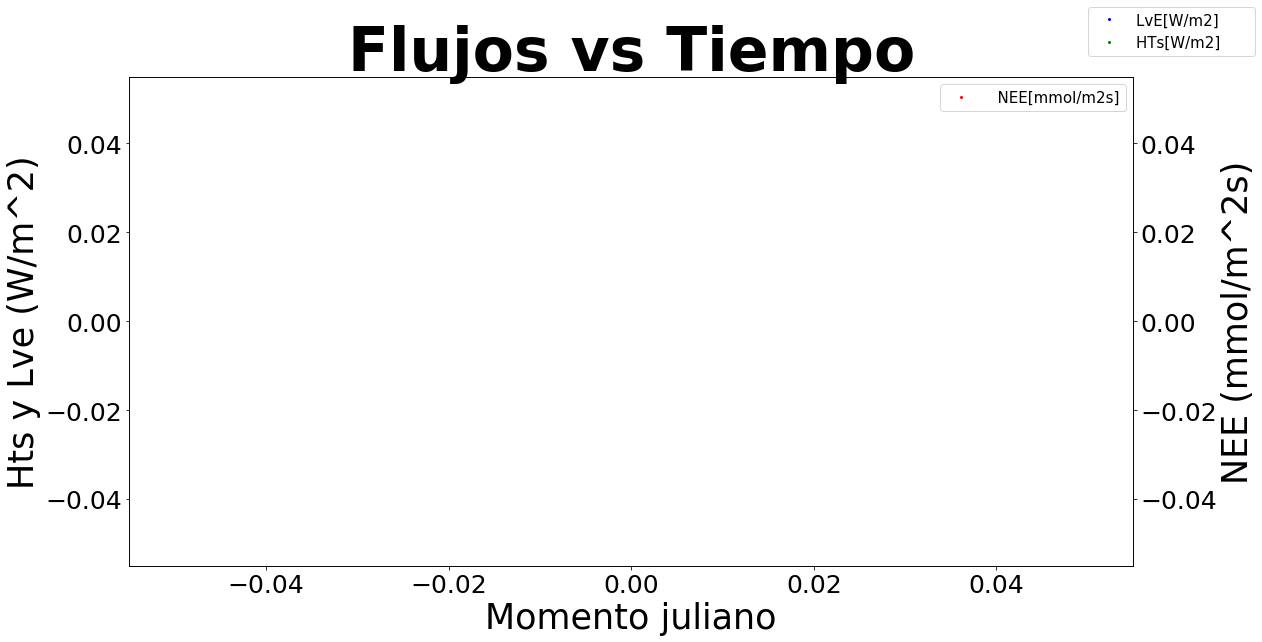

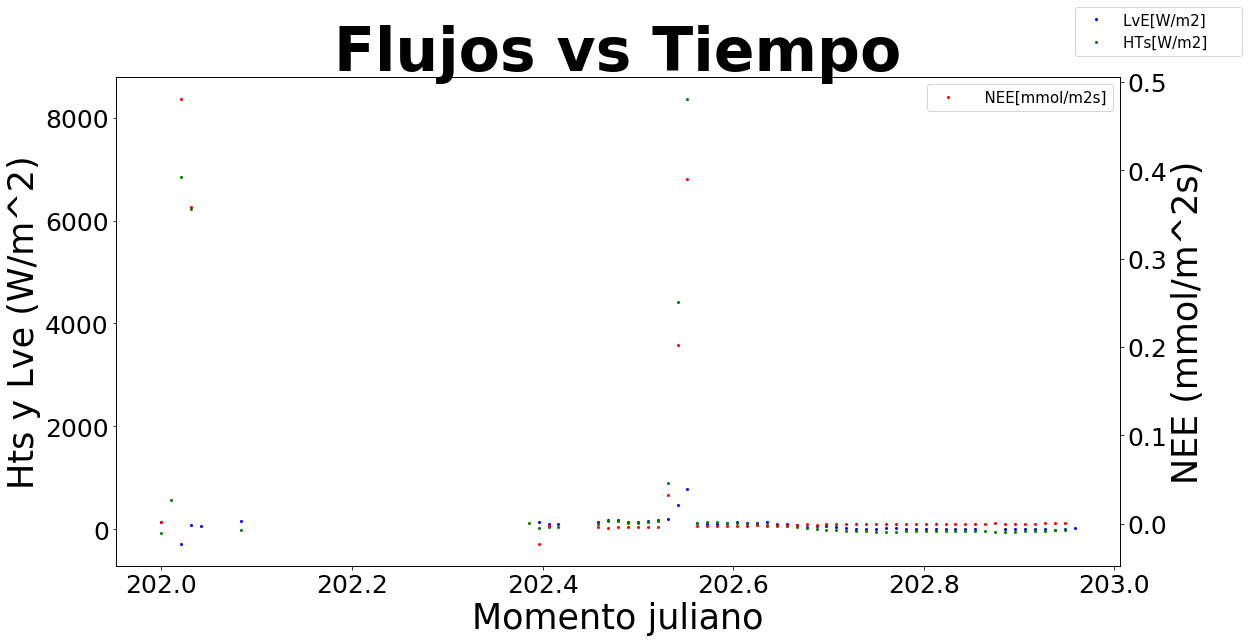

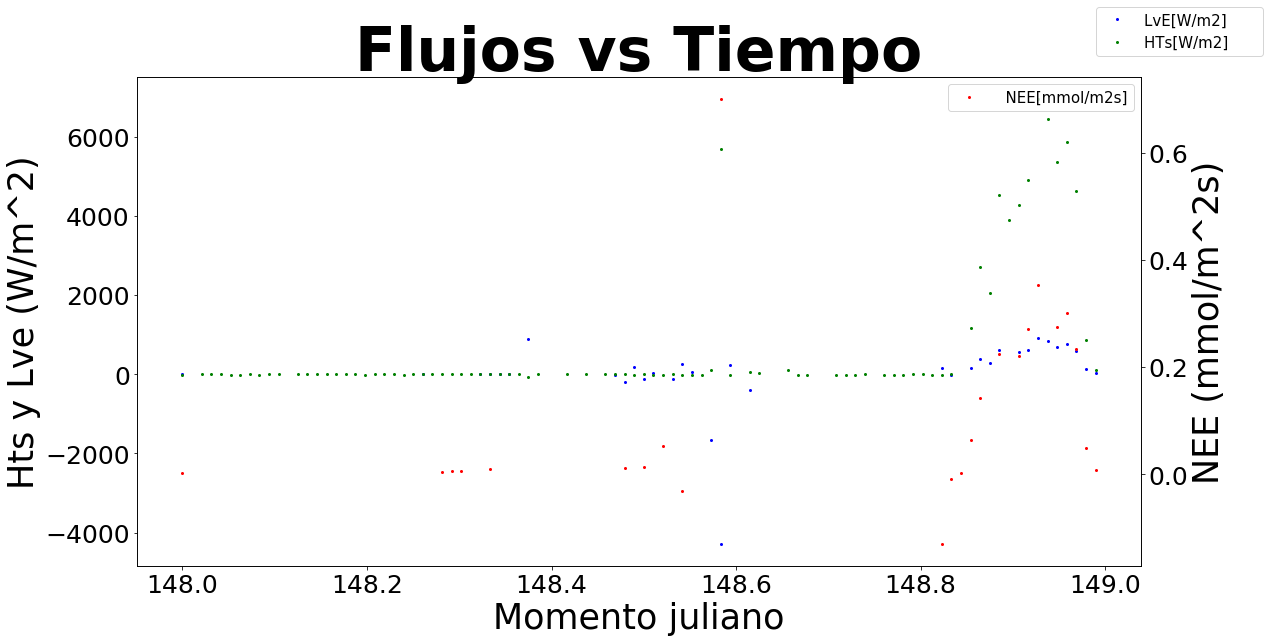

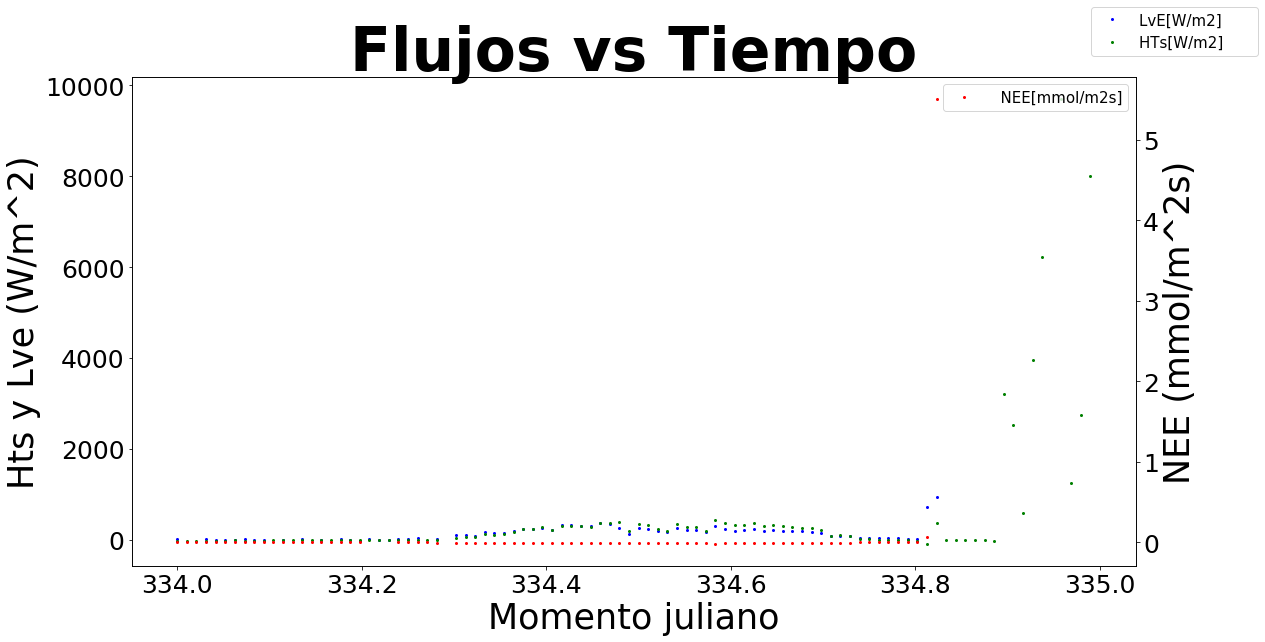

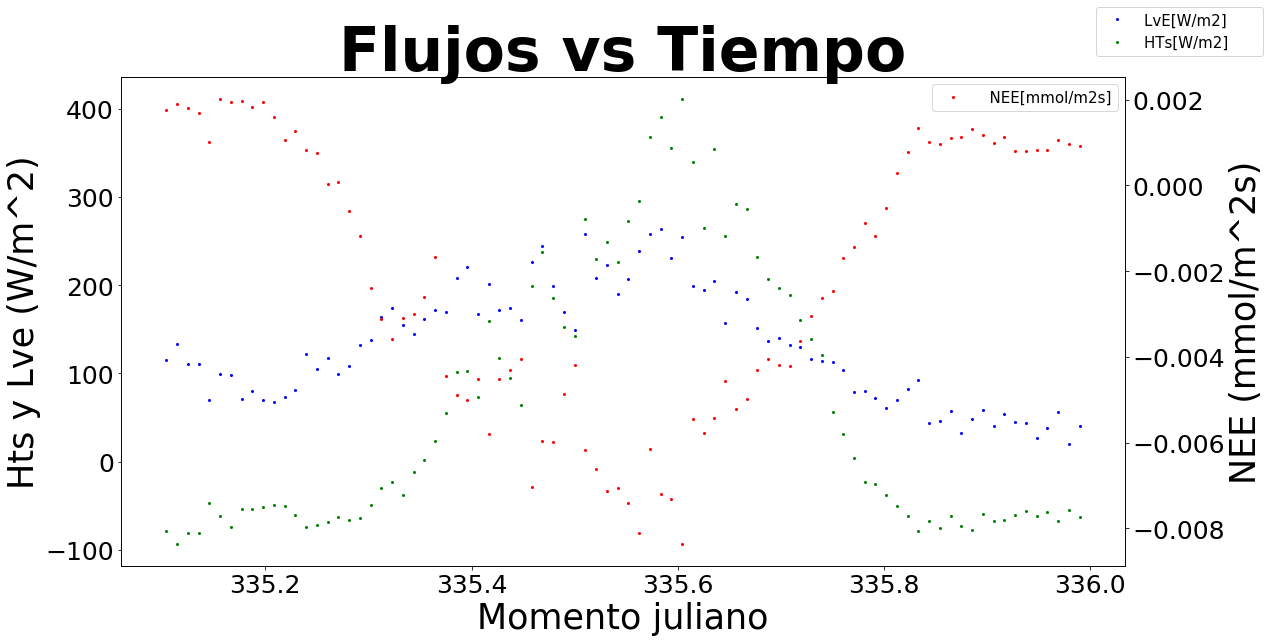

In [185]:
dias_malos_2 = [220, 201, 202, 148,
                334, 335 
               ]
for i in dias_malos_2:
    grafico = datos[truncar(datos['Momento']) == i]
    fig, ax1 = plt.subplots(figsize = (18, 9))
    metadata('Flujos vs Tiempo', 'Momento juliano', 'Hts y Lve (W/m^2)')
    plt.plot(grafico['Momento'], grafico['LvE[W/m2]      '], 'bo', markersize = 2)
    plt.plot(grafico['Momento'], grafico['HTs[W/m2]      '], 'go', markersize = 2)   
    plt.figlegend(fontsize = 15)
    ax2 = ax1.twinx()
    ax2.set_ylabel('NEE (mmol/m^2s)', fontsize = 35)
    plt.yticks(fontsize = 25)
    ax2.plot(grafico['Momento'], grafico['  NEE[mmol/m2s]'], 'ro', markersize = 2)
    plt.legend(fontsize = 15)

In [206]:
momentos_malos_2 = [220.4, 220.7, 202, 202.1,
                    202.5, 202.6, 148.8, 149,
                    334.8, 335, 314.9, 315.1,
                    313.75, 313.85
                   ]
iterador = np.arange(0, len(momentos_malos_2), 2)
col = ['  NEE[mmol/m2s]', 'LvE[W/m2]      ', 'HTs[W/m2]      ']
for i in col:
    print(i)
    for j in iterador:
        desde = momentos_malos_2[j]
        hasta = momentos_malos_2[j + 1]
        datos.loc[
            (datos['Momento'] < hasta) & (datos['Momento'] > desde)
            , i
            ] = np.nan

  NEE[mmol/m2s]
LvE[W/m2]      
HTs[W/m2]      


In [208]:
inicio = int(datos['Momento'][0])
dias = ((np.array([inicio, 60, 91, 121,
                   152, 182, 213, 244,
                   274, 305, 335, 366
                   ])
        - np.ones(12) * inicio
       ) * 24*4
       )
estadisticos = datos[col][0:11][:]
estadisticos[[col[0] + '_dev', col[1] + '_dev', col[2] + '_dev']] = datos[col][0:11][:]
estadisticos[[col[0] + '_sup', col[1] + '_sup', col[2] + '_sup']] = datos[col][0:11][:]
estadisticos[[col[0] + '_inf', col[1] + '_inf', col[2] + '_inf']] = datos[col][0:11][:]
iterador_2 = list(range(1, len(dias)))
for j in col:
    for i in iterador_2:
        desde = int(dias[i-1])
        hasta = int(dias[i])
        estadisticos[j][i-1] = datos[j][desde:hasta].mean()
        estadisticos[j + '_dev'][i-1] = datos[j][desde:hasta].std()
    estadisticos[j + '_sup'] = (
        estadisticos[j]
        .add(estadisticos[j + '_dev'].multiply(3))
        )
    estadisticos[j + '_inf'] = (
        estadisticos[j]
        .sub(estadisticos[j + '_dev'].multiply(3))
        )

In [209]:
estadisticos.head(13)

NEE[mmol/m2s]  LvE[W/m2]        HTs[W/m2]          NEE[mmol/m2s]_dev  \
0               NaN              NaN              NaN                  NaN   
1               NaN              NaN              NaN                  NaN   
2          0.001174        38.881294         6.915655             0.009639   
3          0.000171        37.648695         8.121087             0.026770   
4         -0.001975        31.704596        -1.844973             0.023619   
5          0.002927        26.161548         6.023799             0.052639   
6          0.000601        38.514837        23.037912             0.034425   
7         -0.001789        47.955851        49.026490             0.103013   
8         -0.000508        73.914799        63.470838             0.039318   
9          0.002112       101.803897        84.223447             0.080412   
10        -0.002465       104.320270        81.328849             0.012023   

    LvE[W/m2]      _dev  HTs[W/m2]      _dev    NEE[mmol/m2s]_sup  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2             61.397317            58.736105             0.030090   
3            159.048437           198.815017             0.080480   
4             79.141350            63.061993             0.068884   
5             80.644552            53.073796             0.160844   
6             67.597987           112.474597             0.103875   
7            122.042717           200.518267             0.307251   
8            108.970388           187.109080             0.117446   
9            136.321135           493.163243             0.243350   
10           111.168250           149.009923             0.033603   

    LvE[W/m2]      _sup  HTs[W/m2]      _sup    NEE[mmol/m2s]_inf  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2            223.073244           183.123971            -0.027742   
3            514.794007           604.566138            -0.080138   
4            269.128646           187.341006            -0.072833   
5            268.095203           165.245187            -0.154989   
6            241.308798           360.461703            -0.102673   
7            414.084002           650.581291            -0.310829   
8            400.825964           624.798077            -0.118462   
9            510.767302          1563.713177            -0.239125   
10           437.825020           528.358618            -0.038533   

    LvE[W/m2]      _inf  HTs[W/m2]      _inf  
0                   NaN                  NaN  
1                   NaN                  NaN  
2           -145.310657          -169.292661  
3           -439.496616          -588.323963  
4           -205.719454          -191.030952  
5           -215.772107          -153.197589  
6           -164.279124          -314.385879  
7           -318.172300          -552.528312  
8           -252.996366          -497.856401  
9           -307.159507         -1395.266282  
10          -229.184479          -365.700921

In [211]:
datos[col].describe([0.001, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])

NEE[mmol/m2s]  LvE[W/m2]        HTs[W/m2]      
count     16347.000000     15817.000000     18141.000000
mean         -0.000132        59.818568        40.702904
std           0.055568       112.132317       231.617978
min          -3.434829     -4277.639648     -6177.690918
0.1%         -0.212649      -709.425077      -103.473480
1%           -0.021152       -75.026758       -74.146565
5%           -0.008427       -11.690587       -54.475842
25%          -0.002994         2.305816       -25.835609
50%          -0.000024        28.419838        -5.936787
75%           0.001261        95.466736        65.614746
95%           0.004260       242.825684       274.104584
99%           0.024034       357.959126       405.524341
99.9%         0.684181       625.166463       497.983389
max           1.732105      2379.112549     21384.333980

In [213]:
for i in col:
    for j in iterador_2:
        desde = int(dias[j-1])
        hasta = int(dias[j])
        datos[desde:hasta].loc[
            (datos[i][desde:hasta] < estadisticos[i + '_inf'][j-1])
            | (datos[i][desde:hasta] > estadisticos[i + '_sup'][j-1])
            , i
            ] = np.nan

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [214]:
datos[col].describe([0.001, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])

NEE[mmol/m2s]  LvE[W/m2]        HTs[W/m2]      
count     16246.000000     15694.000000     18066.000000
mean         -0.000927        60.056048        36.932447
std           0.010126        83.471030       105.115042
min          -0.243114      -396.093353      -171.430832
0.1%         -0.087012      -197.726741      -100.594914
1%           -0.017782       -47.974658       -74.001948
5%           -0.008303       -11.199496       -54.474853
25%          -0.002978         2.368198       -25.882186
50%          -0.000029        28.333794        -6.067660
75%           0.001246        94.531700        63.868371
95%           0.004118       237.675088       271.935379
99%           0.013183       343.948864       400.956642
99.9%         0.113620       412.829423       474.269448
max           0.236033       490.115417       620.672546

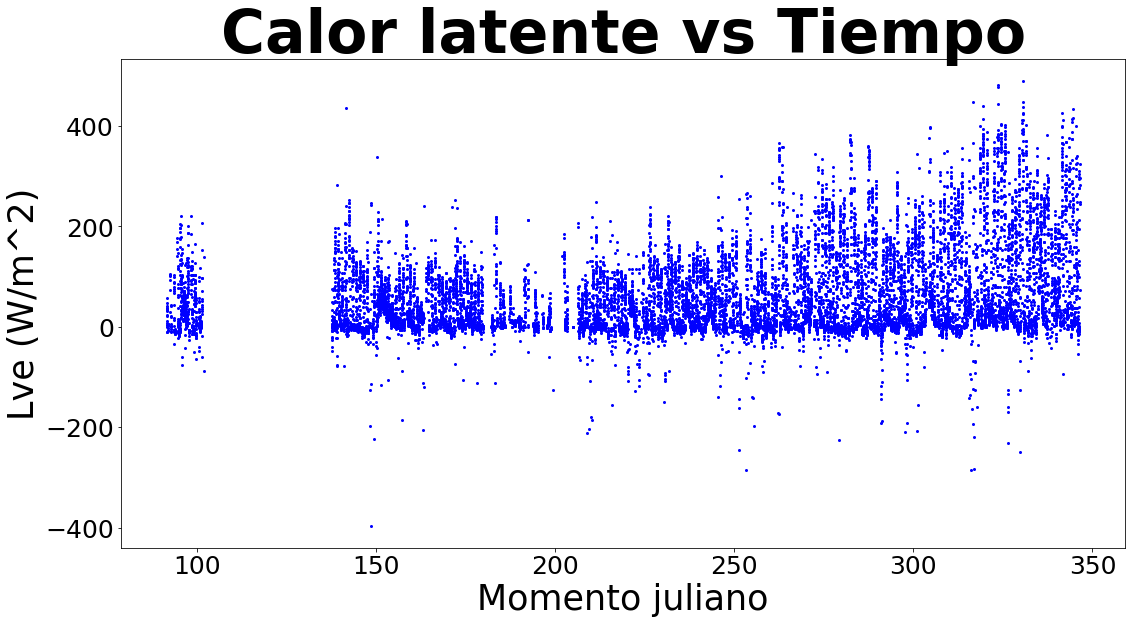

In [229]:
plt.figure(figsize = (18, 9))
metadata('Calor latente vs Tiempo', 'Momento juliano', 'Lve (W/m^2)')
plt.plot(datos['Momento'], datos['LvE[W/m2]      '], 'bo', markersize = 2)

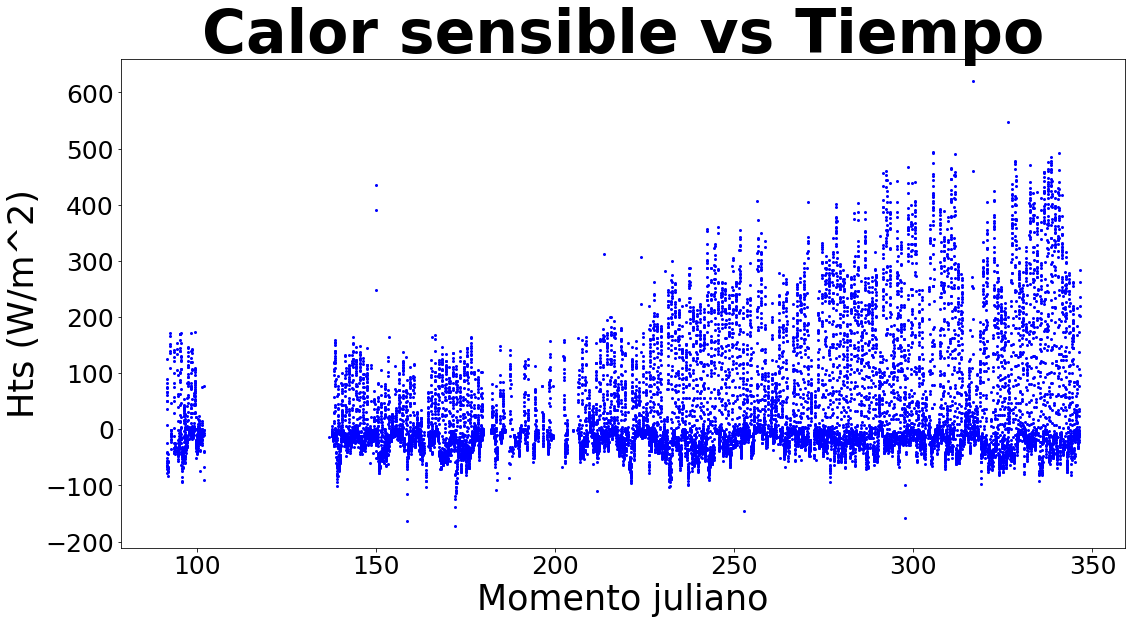

In [232]:
plt.figure(figsize = (18, 9))
metadata('Calor sensible vs Tiempo', 'Momento juliano', 'Hts (W/m^2)')
plt.plot(datos['Momento'], datos['HTs[W/m2]      '], 'bo', markersize = 2)

In [235]:
desde = 150
hasta = 150.05
datos.loc[
    (datos['Momento'] < hasta) & (datos['Momento'] > desde)
    , 'HTs[W/m2]      '
    ] = np.nan

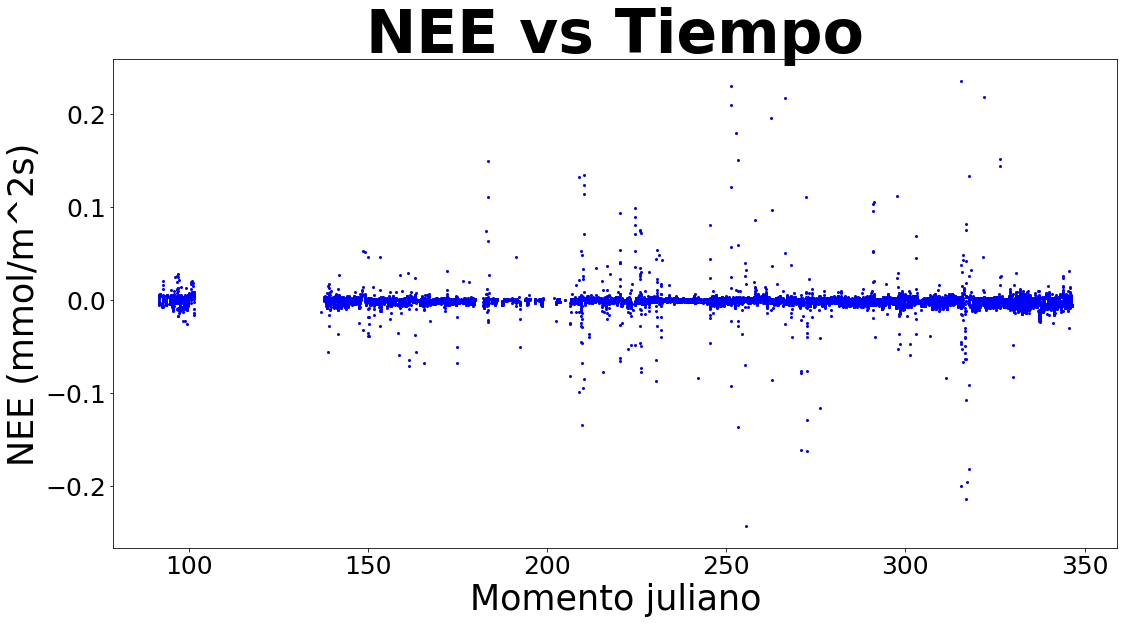

In [234]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos['Momento'], datos['  NEE[mmol/m2s]'], 'bo', markersize = 2)

In [236]:
datos.to_csv('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Datos_buenos.csv',
             sep = '\t',
             na_rep = -9999,
             index = False,
             encoding = 'ascii'
             )

In [ ]:
datos_b = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Datos_buenos.csv',
    delimiter = '\t',
    decimal = '.',
    na_values = -9999,
    encoding = 'ascii',
    )

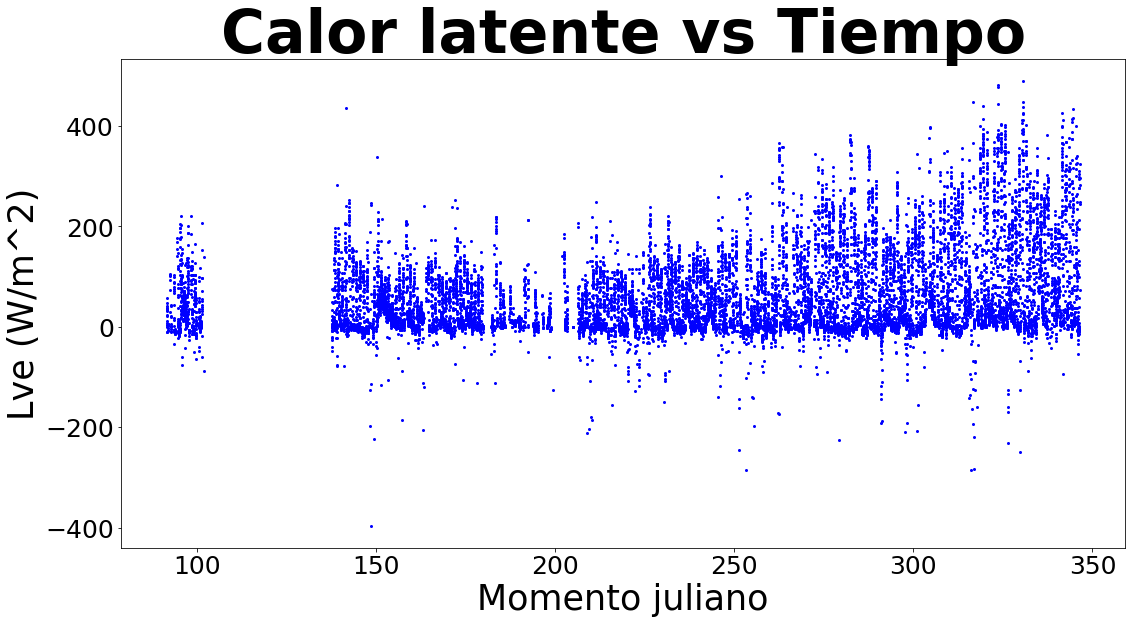

In [278]:
plt.figure(figsize = (18, 9))
metadata('Calor latente vs Tiempo', 'Momento juliano', 'Lve (W/m^2)')
plt.plot(datos_b['Momento'], datos_b['LvE[W/m2]      '], 'bo', markersize = 2)

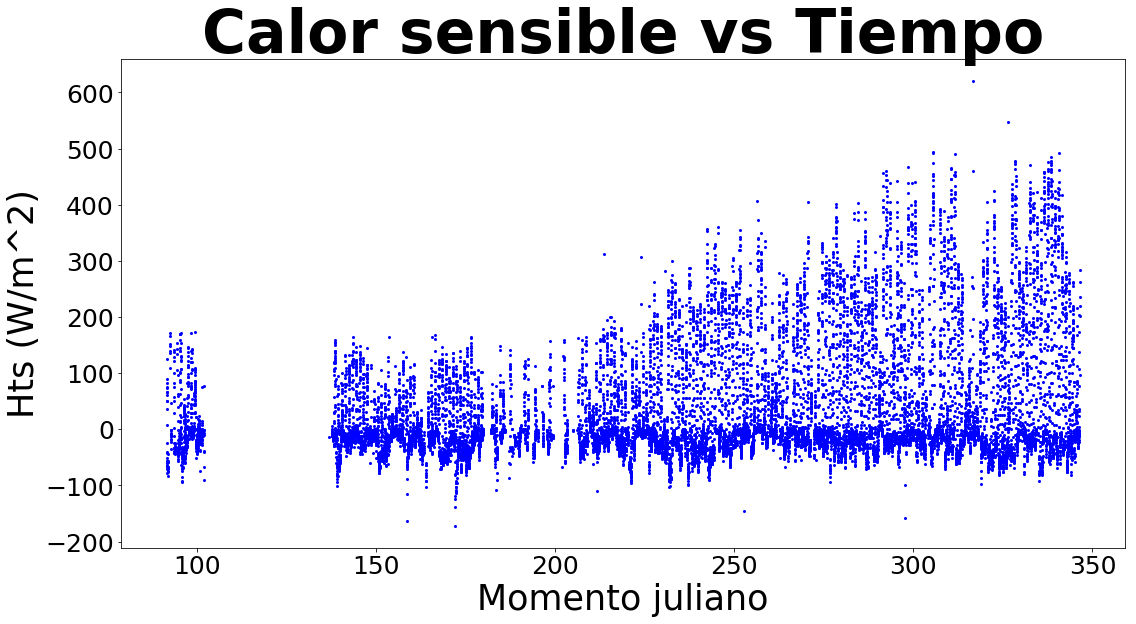

In [279]:
plt.figure(figsize = (18, 9))
metadata('Calor sensible vs Tiempo', 'Momento juliano', 'Hts (W/m^2)')
plt.plot(datos_b['Momento'], datos_b['HTs[W/m2]      '], 'bo', markersize = 2)

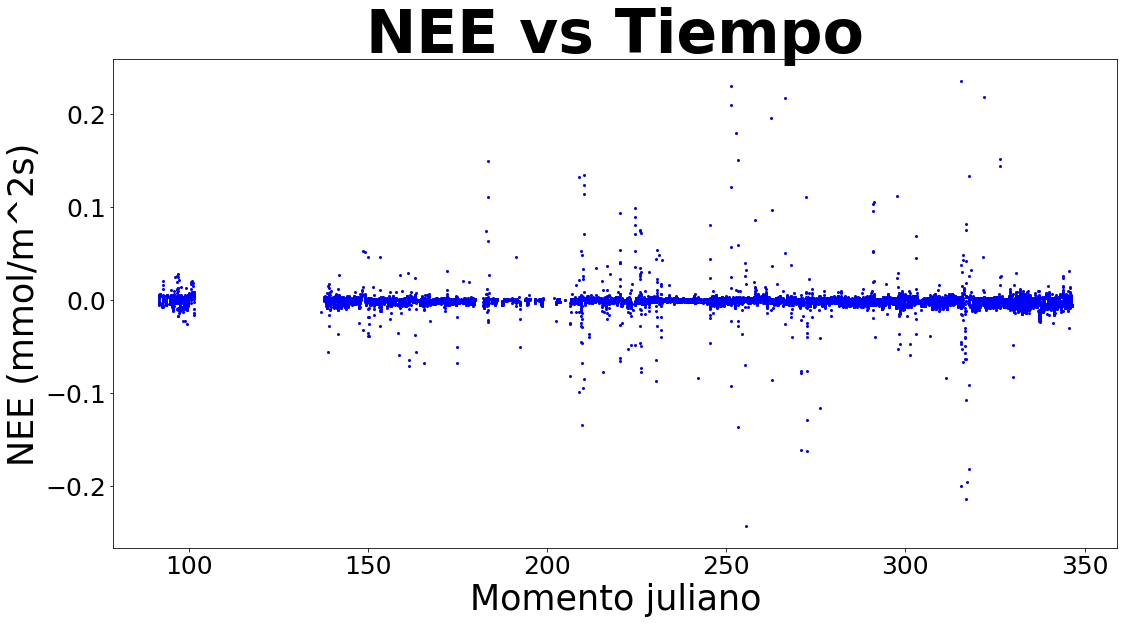

In [394]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos_b['Momento'], datos_b['  NEE[mmol/m2s]'], 'bo', markersize = 2)
#plt.ylim(-0.008, 0.008)
#plt.xlim(345, 347)

In [397]:
mal_nee = [96.75, 97.1, 101.4, 102,
           139.1, 139.3, 148.4, 148.6,
           150, 150.3, 151.5, 151.7,
           153.2, 153.3, 161.2, 161.4,
           172, 172.2, 174.7, 174.9,
           183.5, 183.7, 208.8, 209,
           209.3, 209.8, 210, 210.5,
           215.2, 215.5, 216.7, 217,
           220.2, 220.5, 224, 224.5,
           225.8, 226.3, 230.4, 230.8,
           231.6, 232, 245.2, 245.5,
           251.2, 251.5, 253, 253.4,
           266.4, 266.5, 266.1, 266.4,
           270.7, 270.9, 272.3, 272.5,
           290.9, 291.1, 291.3, 219.4,
           297.7, 297.9, 315.5, 316,
           316.5, 316.8, 317.1, 317.5,
           326.5, 326.6, 329.9, 330,
           343.7, 344.1, 
          ]
iterador_3 = np.arange(0, len(mal_nee), 2)
for j in iterador_3:
    desde = mal_nee[j]
    hasta = mal_nee[j + 1]
    datos_b.loc[
        (datos_b['Momento'] < hasta) & (datos_b['Momento'] > desde)
        , '  NEE[mmol/m2s]'
        ] = np.nan

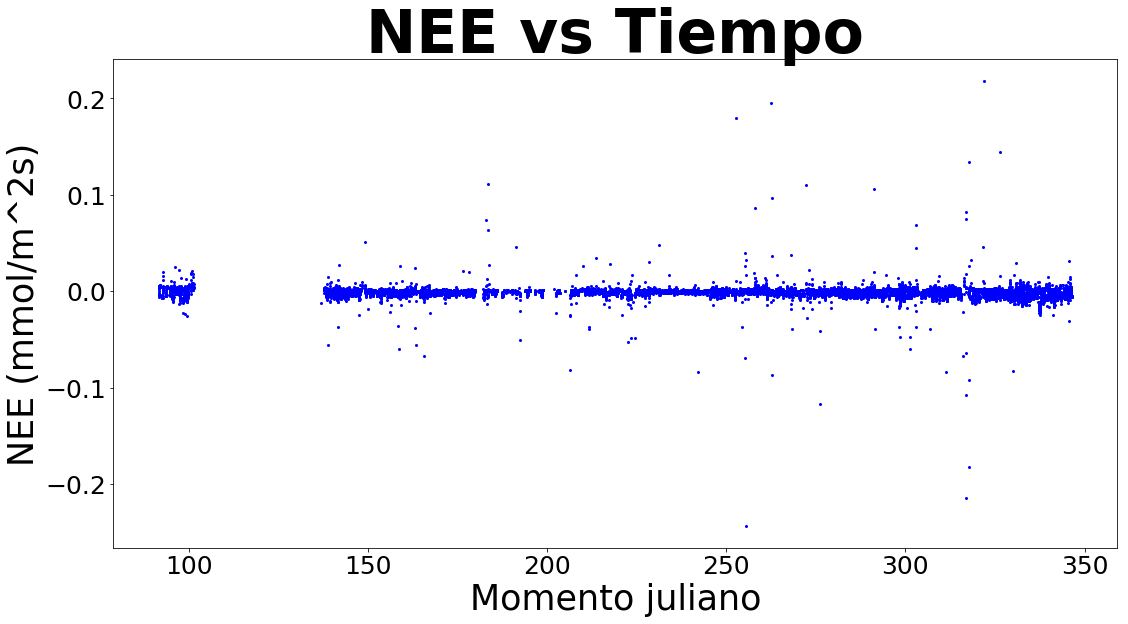

In [398]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos_b['Momento'], datos_b['  NEE[mmol/m2s]'], 'bo', markersize = 2)

In [403]:
inicio = int(datos_b['Momento'][0])
dias = ((np.array([inicio, 60, 91, 121,
                   152, 182, 213, 244,
                   274, 305, 335, 366
                   ])
        - np.ones(12) * inicio
       ) * 24*4
       )
estadisticos = datos_b[col][0:11][:]
estadisticos[[col[0] + '_dev', col[1] + '_dev', col[2] + '_dev']] = datos_b[col][0:11][:]
estadisticos[[col[0] + '_sup', col[1] + '_sup', col[2] + '_sup']] = datos_b[col][0:11][:]
estadisticos[[col[0] + '_inf', col[1] + '_inf', col[2] + '_inf']] = datos_b[col][0:11][:]
iterador_2 = list(range(1, len(dias)))
for i in iterador_2:
    desde = int(dias[i-1])
    hasta = int(dias[i])
    estadisticos['  NEE[mmol/m2s]'][i-1] = datos_b['  NEE[mmol/m2s]'][desde:hasta].mean()
    estadisticos['  NEE[mmol/m2s]_dev'][i-1] = datos_b['  NEE[mmol/m2s]'][desde:hasta].std()
estadisticos['  NEE[mmol/m2s]_sup'] = (
        estadisticos['  NEE[mmol/m2s]']
        .add(estadisticos['  NEE[mmol/m2s]_dev'].multiply(3))
        )
estadisticos['  NEE[mmol/m2s]_inf'] = (
        estadisticos['  NEE[mmol/m2s]']
        .sub(estadisticos['  NEE[mmol/m2s]_dev'].multiply(3))
        )
estadisticos.head(11)

NEE[mmol/m2s]  LvE[W/m2]        HTs[W/m2]          NEE[mmol/m2s]_dev  \
0               NaN              NaN              NaN                  NaN   
1               NaN              NaN              NaN                  NaN   
2          0.000560              NaN              NaN             0.005455   
3         -0.000601              NaN              NaN             0.004211   
4         -0.000992              NaN              NaN             0.003629   
5         -0.000407              NaN              NaN             0.006286   
6         -0.000459              NaN              NaN             0.003555   
7         -0.000173              NaN              NaN             0.009994   
8         -0.001084              NaN              NaN             0.005345   
9         -0.001687              NaN              NaN             0.010819   
10        -0.002803              NaN              NaN             0.006684   

    LvE[W/m2]      _dev  HTs[W/m2]      _dev    NEE[mmol/m2s]_sup  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN             0.016924   
3                   NaN                  NaN             0.012032   
4                   NaN                  NaN             0.009894   
5                   NaN                  NaN             0.018452   
6                   NaN                  NaN             0.010206   
7                   NaN                  NaN             0.029809   
8                   NaN                  NaN             0.014951   
9                   NaN                  NaN             0.030770   
10                  NaN                  NaN             0.017249   

    LvE[W/m2]      _sup  HTs[W/m2]      _sup    NEE[mmol/m2s]_inf  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN            -0.015804   
3                   NaN                  NaN            -0.013233   
4                   NaN                  NaN            -0.011878   
5                   NaN                  NaN            -0.019265   
6                   NaN                  NaN            -0.011123   
7                   NaN                  NaN            -0.030154   
8                   NaN                  NaN            -0.017120   
9                   NaN                  NaN            -0.034143   
10                  NaN                  NaN            -0.022856   

    LvE[W/m2]      _inf  HTs[W/m2]      _inf  
0                   NaN                  NaN  
1                   NaN                  NaN  
2                   NaN                  NaN  
3                   NaN                  NaN  
4                   NaN                  NaN  
5                   NaN                  NaN  
6                   NaN                  NaN  
7                   NaN                  NaN  
8                   NaN                  NaN  
9                   NaN                  NaN  
10                  NaN                  NaN

In [417]:
for j in iterador_2:
    desde = int(dias[j-1])
    hasta = int(dias[j])
    datos_b[desde:hasta].loc[
        (datos_b['  NEE[mmol/m2s]'][desde:hasta] < estadisticos['  NEE[mmol/m2s]_inf'][j-1])
        | (datos_b['  NEE[mmol/m2s]'][desde:hasta] > estadisticos['  NEE[mmol/m2s]_sup'][j-1])
        , '  NEE[mmol/m2s]'
        ] = np.nan

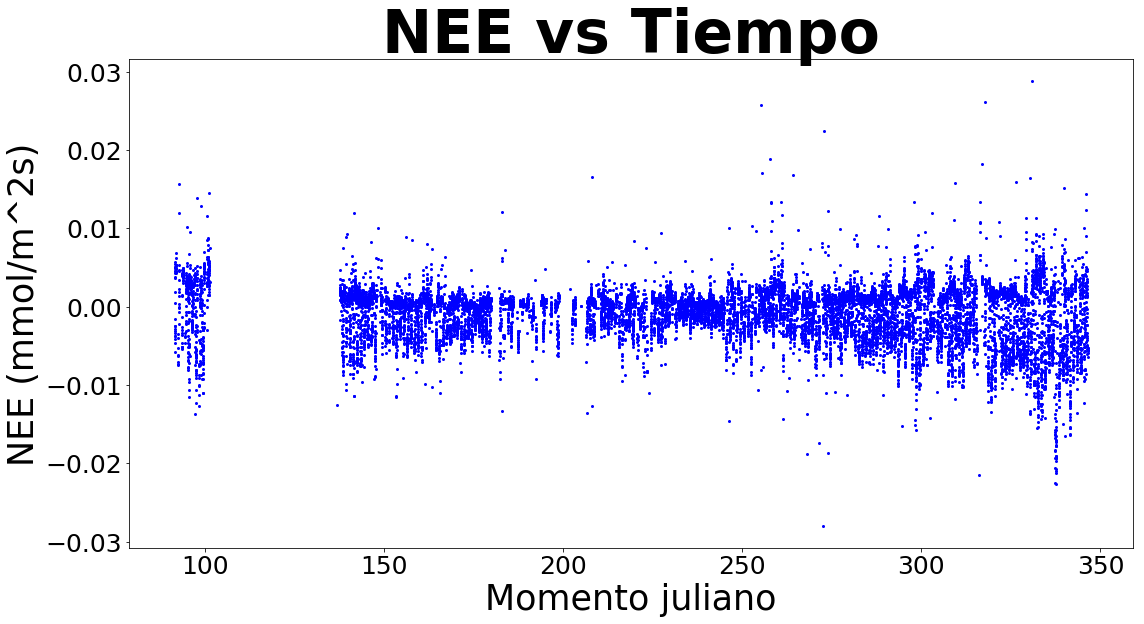

In [418]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos_b['Momento'], datos_b['  NEE[mmol/m2s]'], 'bo', markersize = 2)

In [419]:
for i in iterador_2:
    desde = int(dias[i-1])
    hasta = int(dias[i])
    estadisticos['  NEE[mmol/m2s]'][i-1] = datos_b['  NEE[mmol/m2s]'][desde:hasta].mean()
    estadisticos['  NEE[mmol/m2s]_dev'][i-1] = datos_b['  NEE[mmol/m2s]'][desde:hasta].std()
estadisticos['  NEE[mmol/m2s]_sup'] = (
        estadisticos['  NEE[mmol/m2s]']
        .add(estadisticos['  NEE[mmol/m2s]_dev'].multiply(3))
        )
estadisticos['  NEE[mmol/m2s]_inf'] = (
        estadisticos['  NEE[mmol/m2s]']
        .sub(estadisticos['  NEE[mmol/m2s]_dev'].multiply(3))
        )
estadisticos.head(11)

NEE[mmol/m2s]  LvE[W/m2]        HTs[W/m2]          NEE[mmol/m2s]_dev  \
0               NaN              NaN              NaN                  NaN   
1               NaN              NaN              NaN                  NaN   
2          0.000442              NaN              NaN             0.004685   
3         -0.000565              NaN              NaN             0.003100   
4         -0.000879              NaN              NaN             0.002234   
5         -0.000453              NaN              NaN             0.002100   
6         -0.000390              NaN              NaN             0.001709   
7         -0.000346              NaN              NaN             0.003077   
8         -0.000999              NaN              NaN             0.003282   
9         -0.001612              NaN              NaN             0.004763   
10        -0.002841              NaN              NaN             0.006449   

    LvE[W/m2]      _dev  HTs[W/m2]      _dev    NEE[mmol/m2s]_sup  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN             0.014497   
3                   NaN                  NaN             0.008736   
4                   NaN                  NaN             0.005823   
5                   NaN                  NaN             0.005847   
6                   NaN                  NaN             0.004735   
7                   NaN                  NaN             0.008886   
8                   NaN                  NaN             0.008846   
9                   NaN                  NaN             0.012678   
10                  NaN                  NaN             0.016508   

    LvE[W/m2]      _sup  HTs[W/m2]      _sup    NEE[mmol/m2s]_inf  \
0                   NaN                  NaN                  NaN   
1                   NaN                  NaN                  NaN   
2                   NaN                  NaN            -0.013612   
3                   NaN                  NaN            -0.009865   
4                   NaN                  NaN            -0.007581   
5                   NaN                  NaN            -0.006753   
6                   NaN                  NaN            -0.005516   
7                   NaN                  NaN            -0.009579   
8                   NaN                  NaN            -0.010844   
9                   NaN                  NaN            -0.015902   
10                  NaN                  NaN            -0.022189   

    LvE[W/m2]      _inf  HTs[W/m2]      _inf  
0                   NaN                  NaN  
1                   NaN                  NaN  
2                   NaN                  NaN  
3                   NaN                  NaN  
4                   NaN                  NaN  
5                   NaN                  NaN  
6                   NaN                  NaN  
7                   NaN                  NaN  
8                   NaN                  NaN  
9                   NaN                  NaN  
10                  NaN                  NaN

In [420]:
for j in iterador_2:
    desde = int(dias[j-1])
    hasta = int(dias[j])
    datos_b[desde:hasta].loc[
        (datos_b['  NEE[mmol/m2s]'][desde:hasta] < estadisticos['  NEE[mmol/m2s]_inf'][j-1])
        | (datos_b['  NEE[mmol/m2s]'][desde:hasta] > estadisticos['  NEE[mmol/m2s]_sup'][j-1])
        , '  NEE[mmol/m2s]'
        ] = np.nan

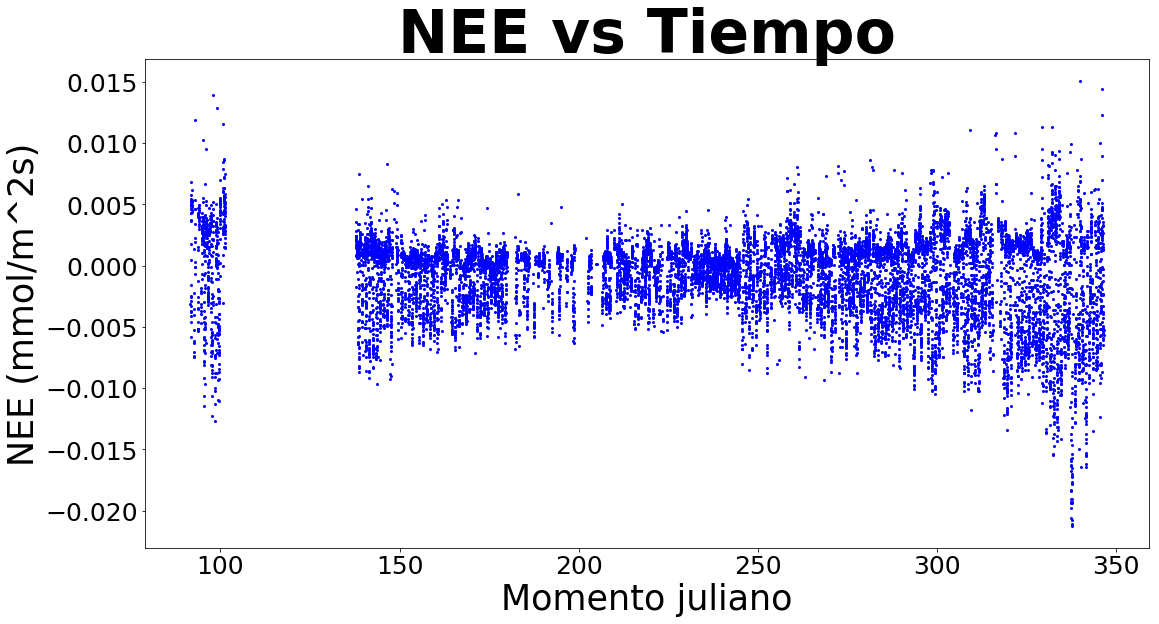

In [421]:
plt.figure(figsize = (18, 9))
metadata('NEE vs Tiempo', 'Momento juliano', 'NEE (mmol/m^2s)')
plt.plot(datos_b['Momento'], datos_b['  NEE[mmol/m2s]'], 'bo', markersize = 2)

In [422]:
datos_b[col].describe([0.001, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])

NEE[mmol/m2s]  LvE[W/m2]        HTs[W/m2]      
count     15538.000000     15694.000000     18063.000000
mean         -0.000966        60.056048        36.879102
std           0.003583        83.471030       105.037221
min          -0.021272      -396.093353      -171.430832
0.1%         -0.019070      -197.726741      -100.596272
1%           -0.012368       -47.974658       -74.003427
5%           -0.007462       -11.199496       -54.475446
25%          -0.002879         2.368198       -25.887144
50%          -0.000022        28.333794        -6.083705
75%           0.001210        94.531700        63.820221
95%           0.003604       237.675088       271.819275
99%           0.006092       343.948864       400.779009
99.9%         0.010741       412.829423       474.269779
max           0.015088       490.115417       620.672546

In [423]:
datos_b.to_csv('C:\\Users\\nahue\\Desktop\\Tesis_2\\Datos\\Datos_buenos_2.csv',
             sep = '\t',
             na_rep = -9999,
             index = False,
             encoding = 'ascii'
             )